In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
import time, datetime
import wave

In [14]:
with open('confession_balloon.json', 'rb') as f:
    data = json.loads(f.read())

In [15]:
data

{'bars': [{'confidence': 0.487, 'duration': 1.333, 'start': 0.36359},
  {'confidence': 0.641, 'duration': 1.3342, 'start': 1.69658},
  {'confidence': 0.578, 'duration': 1.33364, 'start': 3.03078},
  {'confidence': 0.392, 'duration': 1.32955, 'start': 4.36442},
  {'confidence': 0.242, 'duration': 1.33321, 'start': 5.69398},
  {'confidence': 0.704, 'duration': 1.33592, 'start': 7.02719},
  {'confidence': 0.464, 'duration': 1.33355, 'start': 8.36312},
  {'confidence': 0.4, 'duration': 1.3267, 'start': 9.69667},
  {'confidence': 0.622, 'duration': 1.33385, 'start': 11.02337},
  {'confidence': 0.609, 'duration': 1.33057, 'start': 12.35722},
  {'confidence': 0.075, 'duration': 1.33239, 'start': 13.6878},
  {'confidence': 0.563, 'duration': 1.3351, 'start': 15.02019},
  {'confidence': 0.271, 'duration': 1.3369, 'start': 16.35529},
  {'confidence': 0.677, 'duration': 1.32798, 'start': 17.69219},
  {'confidence': 0.352, 'duration': 1.3328, 'start': 19.02017},
  {'confidence': 0.487, 'duration':

In [16]:
segments = data['segments']

In [17]:
segments[81]

{'confidence': 1,
 'duration': 0.3434,
 'loudness_max': -4.865,
 'loudness_max_time': 0.03275,
 'loudness_start': -23.458,
 'pitches': [0.03,
  0.09,
  0.138,
  1,
  0.437,
  0.067,
  0.031,
  0.032,
  0.016,
  0.071,
  0.208,
  0.06],
 'start': 26.64472,
 'timbre': [46.434,
  33.069,
  -75.56,
  56.792,
  8.221,
  75.586,
  0.581,
  24.994,
  11.5,
  -33.583,
  -13.836,
  -14.861]}

In [18]:
loudmax = []
for i in segments:
    loudmax.append(i['loudness_max'])
loudmax = np.array(loudmax)    

In [19]:
# 归一化到0-100之间
k = 100/(loudmax.max() - loudmax.min())
b = 100*loudmax.min()/(loudmax.min() - loudmax.max())
loudmax = k * loudmax + b

In [20]:
loudmax.min(), loudmax.max()

(0.0, 100.0)

In [22]:
duration = []
for i in segments:
    duration.append(i['duration'])
duration = np.array(duration)    

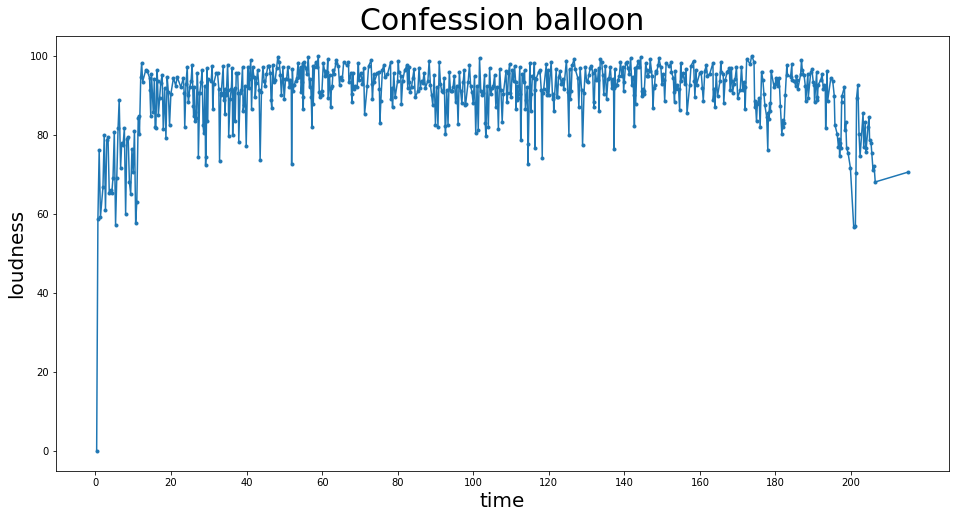

In [24]:
plt.figure(figsize=(16,8))
plt.plot(duration.cumsum(), loudmax, '.-')
plt.xticks(np.arange(0,duration.cumsum()[-1], step=20), rotation=0)
plt.xlabel('time', fontsize=20)
plt.ylabel('loudness', fontsize=20)
plt.title('Confession balloon', fontsize=30)
plt.show()

In [25]:
pitches = []
for i in segments:
    pitches.append(i['pitches'])
pitches = np.array(pitches)    

In [26]:
pitches

array([[0.434, 0.077, 0.048, ..., 0.029, 0.04 , 1.   ],
       [0.04 , 0.02 , 0.013, ..., 0.046, 0.007, 0.032],
       [0.279, 0.099, 0.168, ..., 0.128, 0.031, 1.   ],
       ...,
       [0.134, 1.   , 0.046, ..., 0.012, 0.303, 0.942],
       [0.312, 1.   , 0.041, ..., 0.005, 0.166, 0.894],
       [0.035, 1.   , 0.076, ..., 0.026, 0.091, 0.188]])

In [28]:
(pitches / pitches.sum(axis=1).reshape(-1,1))[4]

array([0.04843409, 0.02002913, 0.02403496, 0.02294246, 0.0203933 ,
       0.02876912, 0.36416606, 0.04479243, 0.05680991, 0.02949745,
       0.05389658, 0.28623452])

0 index,  time 0.33728


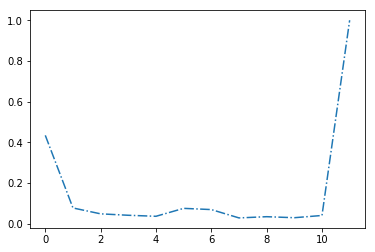

1 index,  time 0.66753


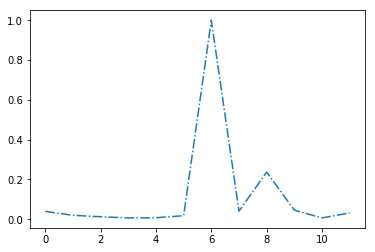

2 index,  time 1.00358


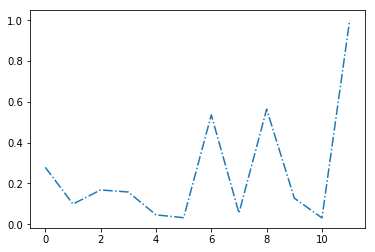

3 index,  time 1.3409


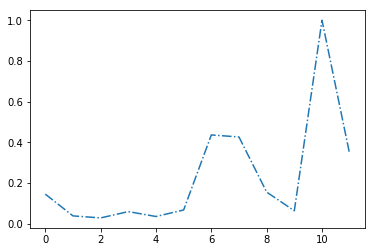

4 index,  time 2.0029


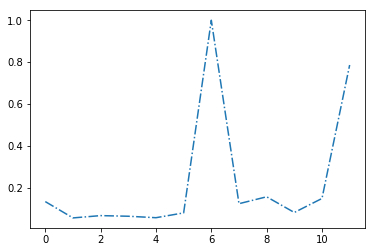

5 index,  time 2.34041


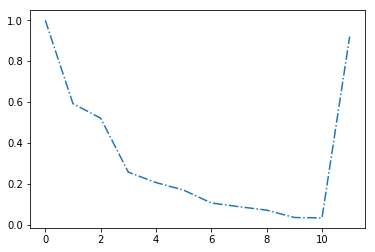

6 index,  time 2.67016


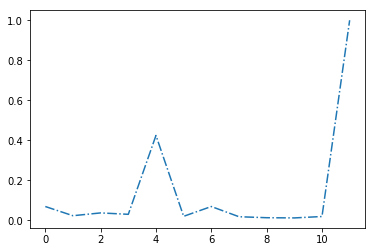

7 index,  time 3.00095


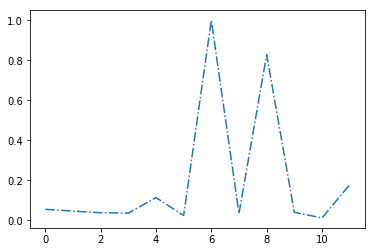

8 index,  time 3.3449


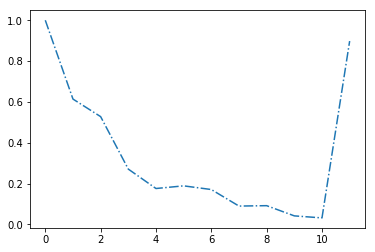

9 index,  time 3.67311


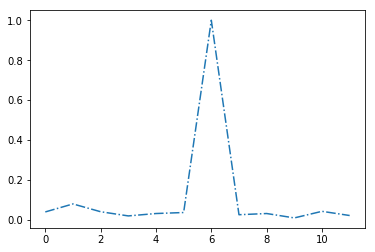

10 index,  time 4.00549


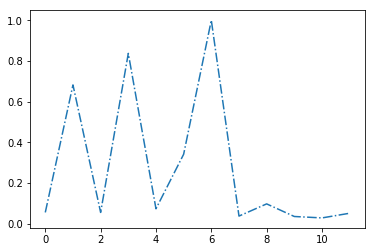

11 index,  time 4.34222


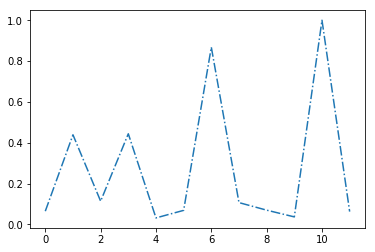

12 index,  time 4.667120000000001


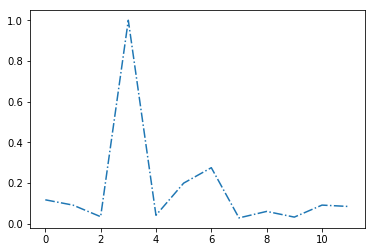

13 index,  time 5.00912


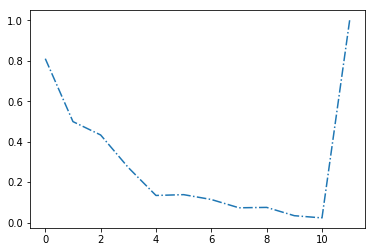

14 index,  time 5.33987


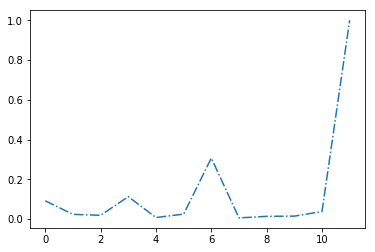

15 index,  time 5.66636


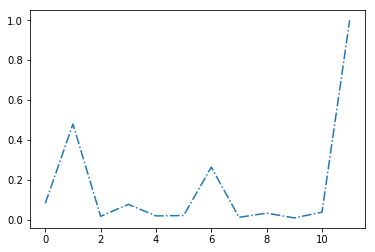

16 index,  time 6.00255


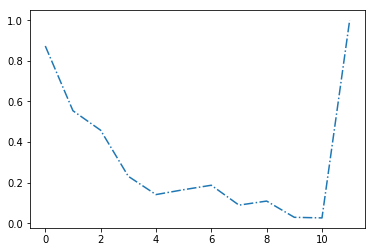

17 index,  time 6.29947


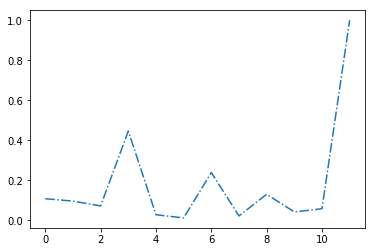

18 index,  time 6.674930000000001


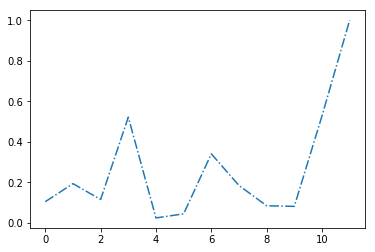

19 index,  time 6.971210000000001


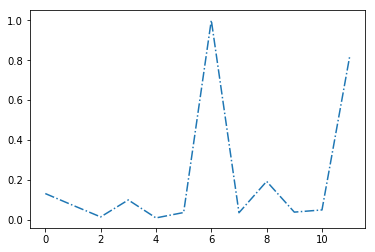

20 index,  time 7.314110000000001


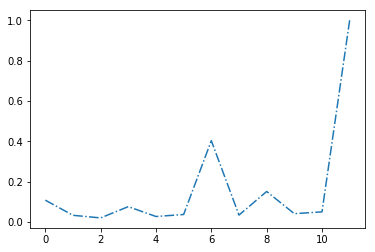

21 index,  time 7.674470000000001


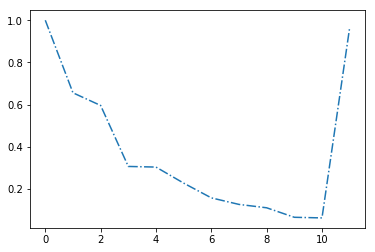

22 index,  time 8.004990000000001


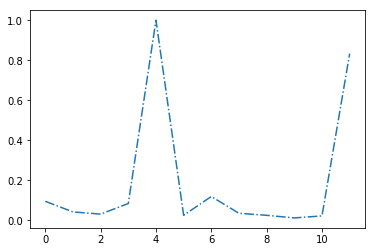

23 index,  time 8.335740000000001


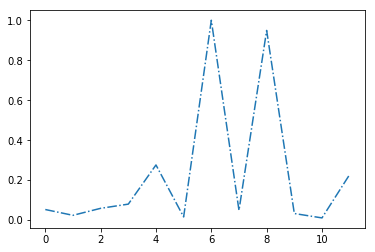

24 index,  time 8.673250000000001


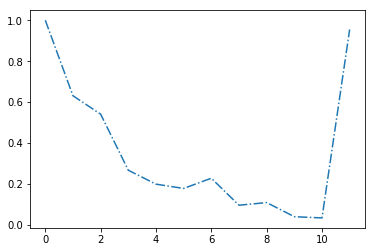

25 index,  time 9.00364


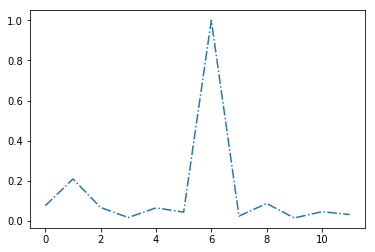

26 index,  time 9.340010000000001


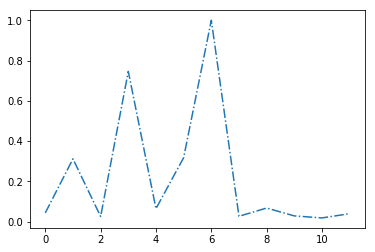

27 index,  time 9.677610000000001


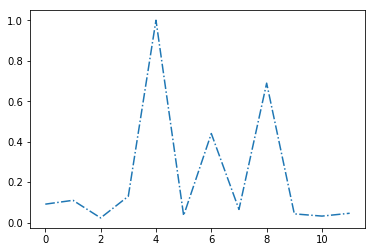

28 index,  time 9.995800000000001


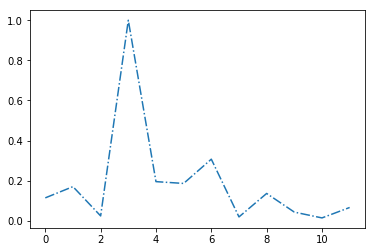

29 index,  time 10.344420000000001


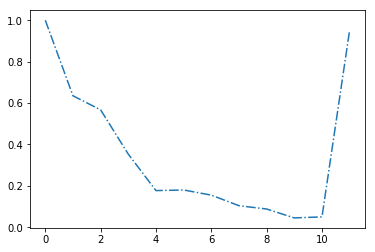

30 index,  time 10.659110000000002


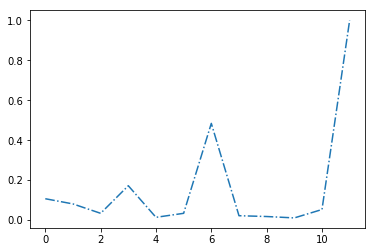

31 index,  time 10.967500000000001


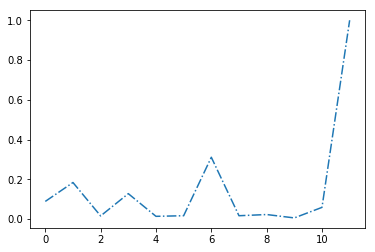

32 index,  time 11.33689


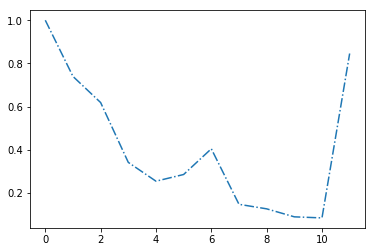

33 index,  time 11.49385


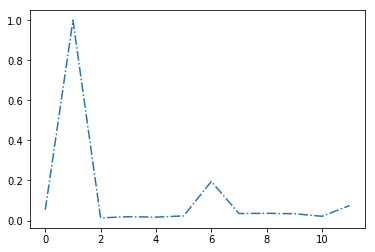

34 index,  time 11.66823


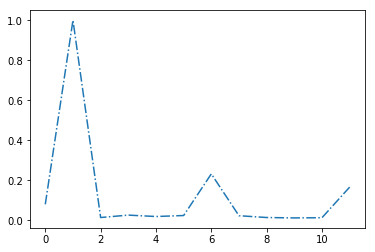

35 index,  time 12.0046


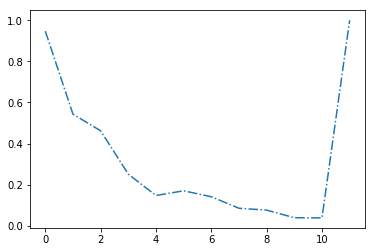

36 index,  time 12.249179999999999


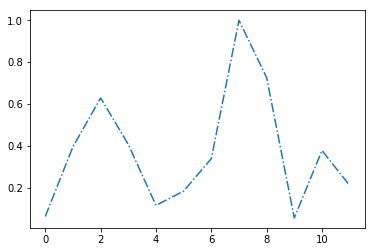

37 index,  time 12.50981


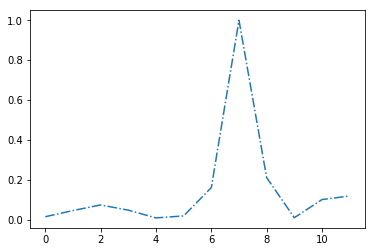

38 index,  time 13.33212


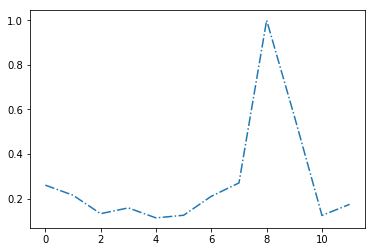

39 index,  time 13.67085


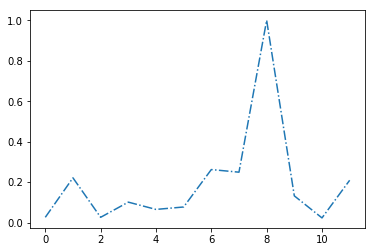

40 index,  time 14.3318


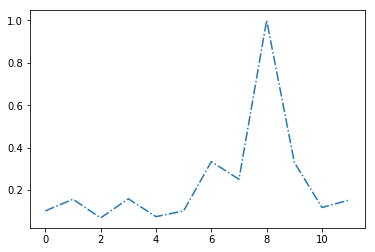

41 index,  time 14.43679


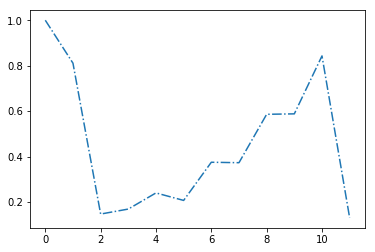

42 index,  time 14.65874


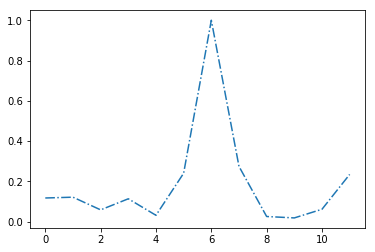

43 index,  time 14.84228


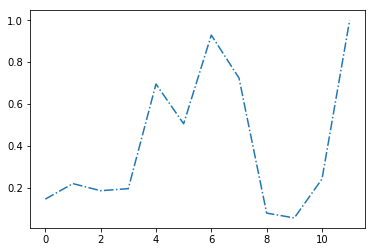

44 index,  time 15.31339


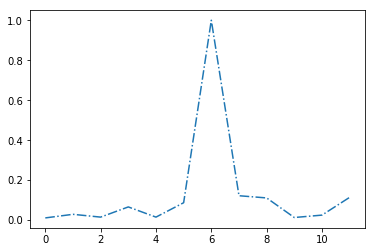

45 index,  time 15.61534


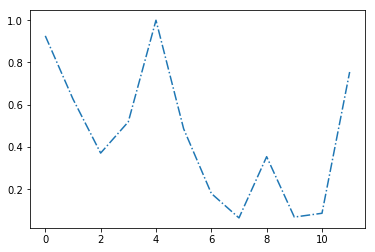

46 index,  time 15.81829


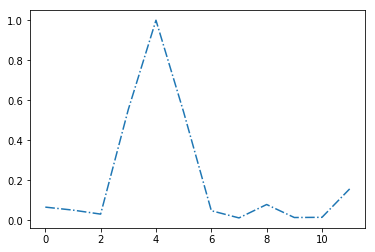

47 index,  time 15.998059999999999


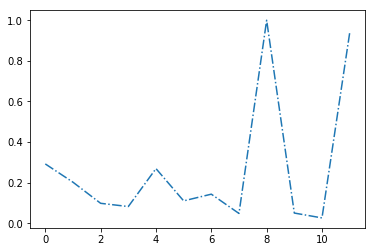

48 index,  time 16.335069999999998


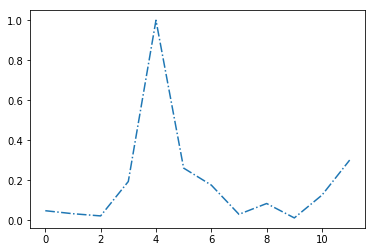

49 index,  time 16.44605


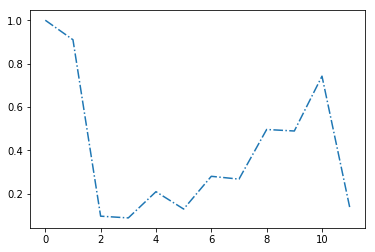

50 index,  time 16.67204


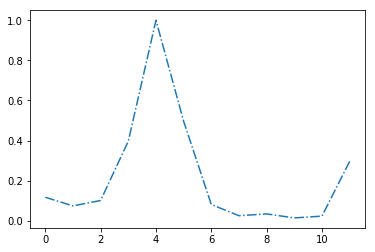

51 index,  time 17.00406


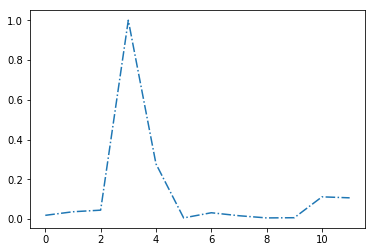

52 index,  time 17.30615


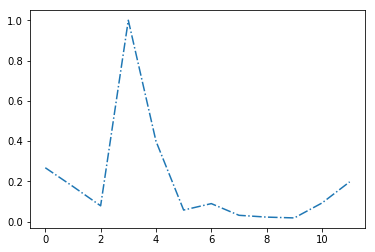

53 index,  time 17.678169999999998


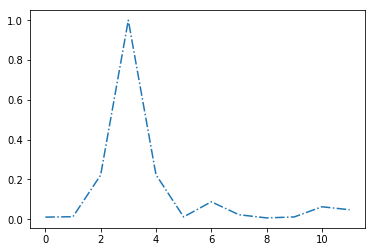

54 index,  time 17.96098


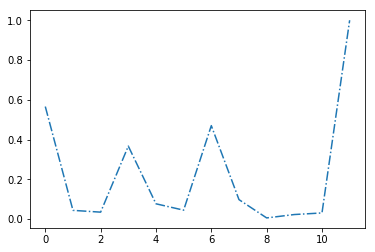

55 index,  time 18.33622


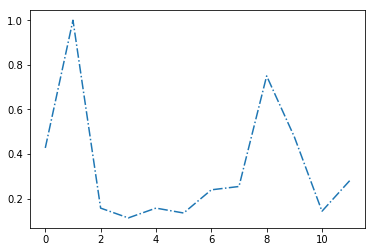

56 index,  time 18.669420000000002


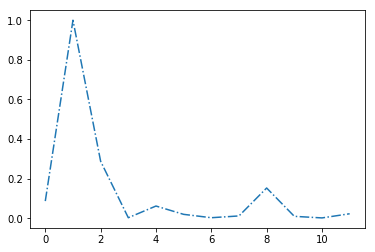

57 index,  time 18.999900000000004


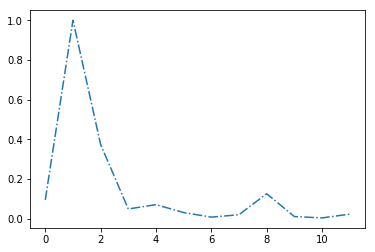

58 index,  time 19.307200000000005


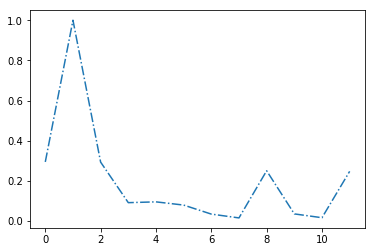

59 index,  time 19.623350000000006


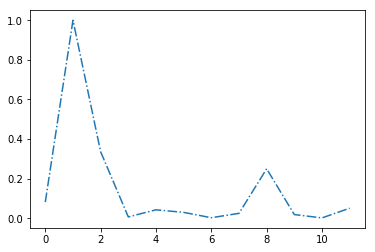

60 index,  time 19.980950000000007


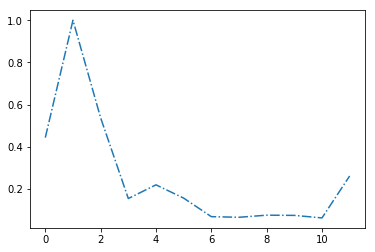

61 index,  time 20.66363000000001


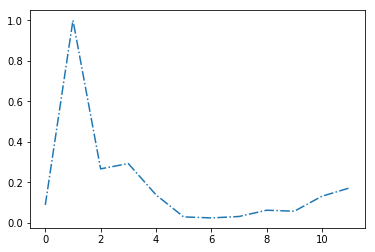

62 index,  time 21.251110000000008


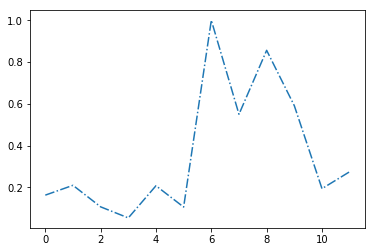

63 index,  time 21.664040000000007


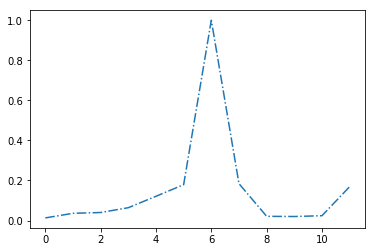

64 index,  time 22.629070000000006


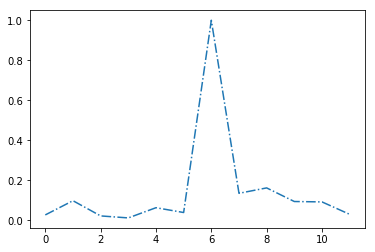

65 index,  time 23.285310000000006


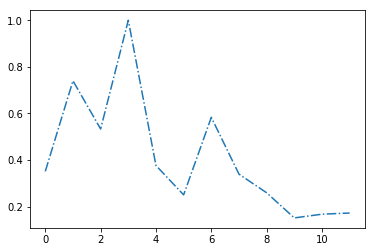

66 index,  time 23.497460000000007


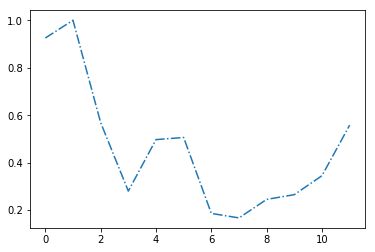

67 index,  time 23.651470000000007


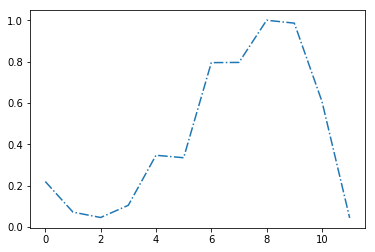

68 index,  time 23.979770000000006


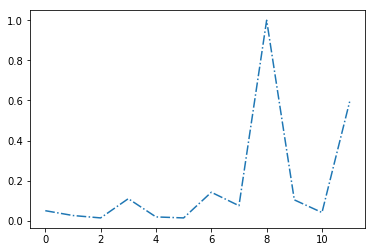

69 index,  time 24.311240000000005


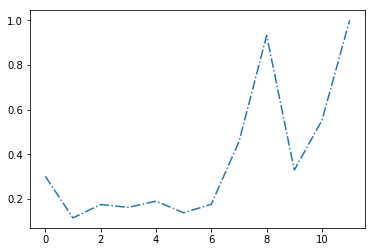

70 index,  time 24.486520000000006


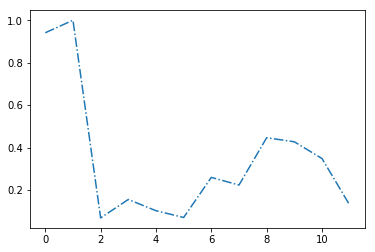

71 index,  time 24.642800000000005


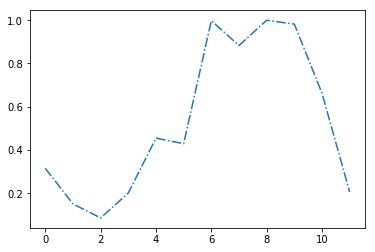

72 index,  time 24.983980000000006


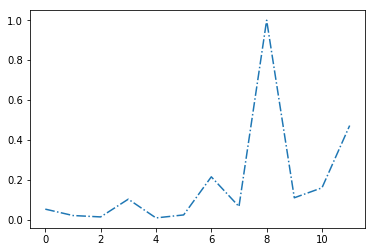

73 index,  time 25.331550000000007


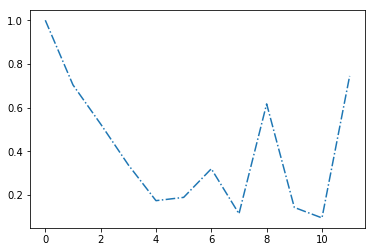

74 index,  time 25.612320000000008


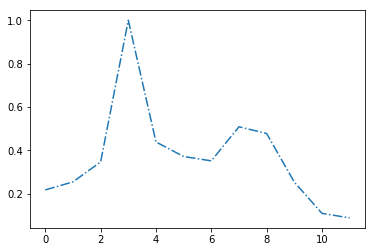

75 index,  time 25.90180000000001


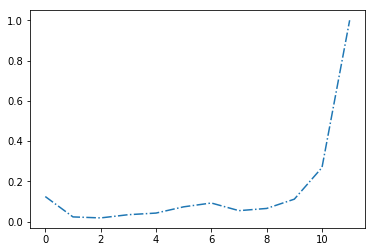

76 index,  time 26.00661000000001


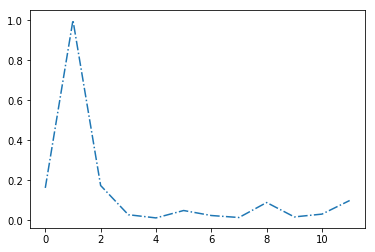

77 index,  time 26.19364000000001


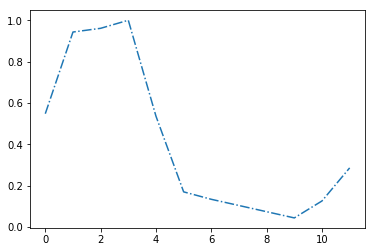

78 index,  time 26.33545000000001


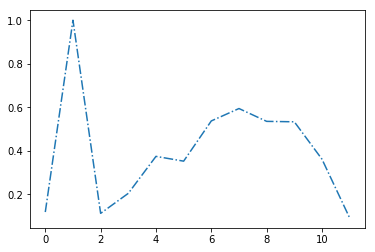

79 index,  time 26.46493000000001


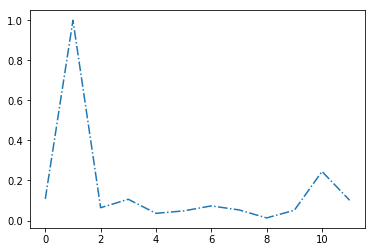

80 index,  time 26.64475000000001


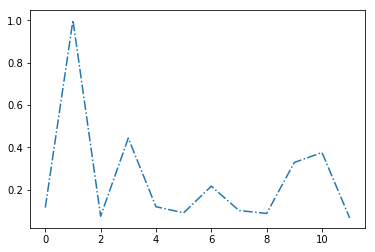

81 index,  time 26.988150000000008


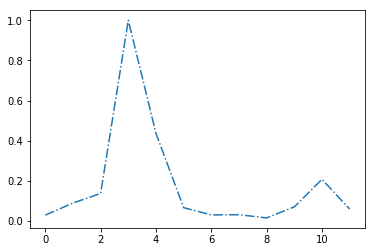

82 index,  time 27.136900000000008


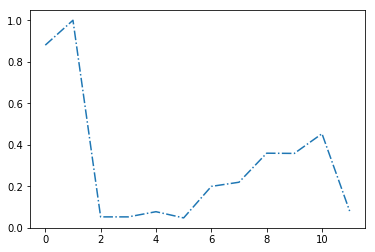

83 index,  time 27.250910000000008


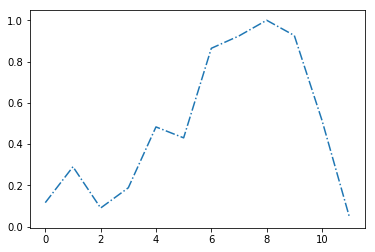

84 index,  time 27.626330000000006


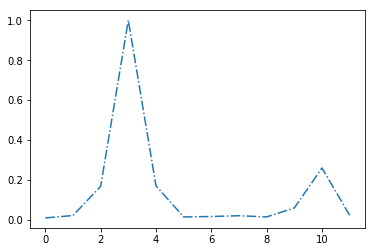

85 index,  time 27.987370000000006


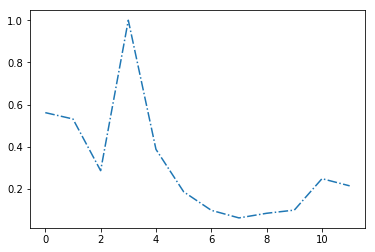

86 index,  time 28.251360000000005


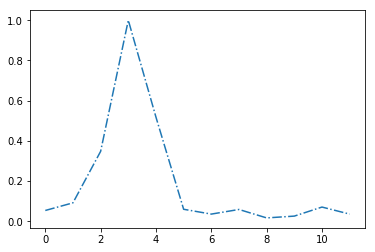

87 index,  time 28.494580000000006


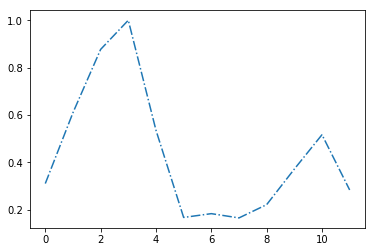

88 index,  time 28.670860000000005


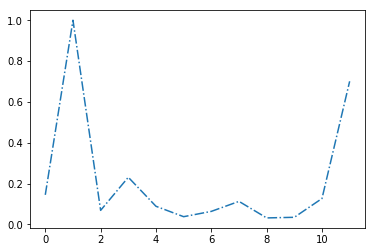

89 index,  time 28.992040000000003


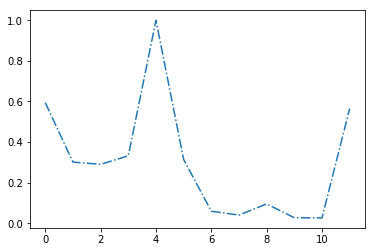

90 index,  time 29.162650000000003


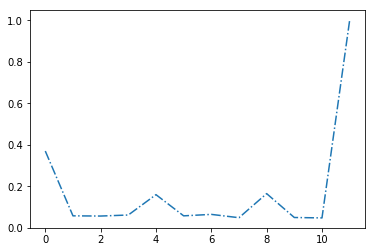

91 index,  time 29.283780000000004


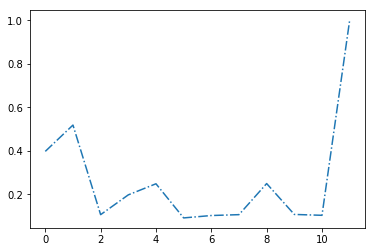

92 index,  time 29.564190000000004


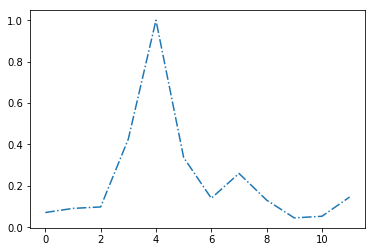

93 index,  time 29.669310000000003


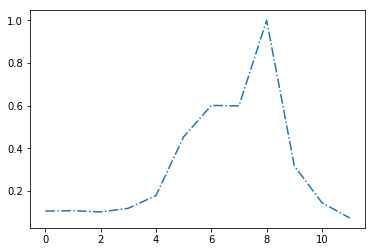

94 index,  time 29.896430000000002


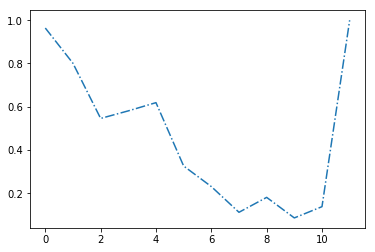

95 index,  time 30.6353


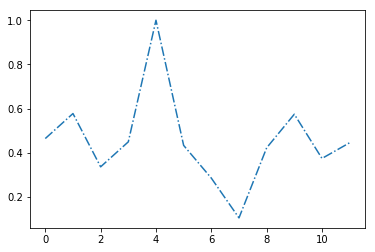

96 index,  time 30.926460000000002


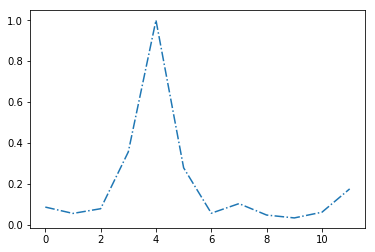

97 index,  time 31.06809


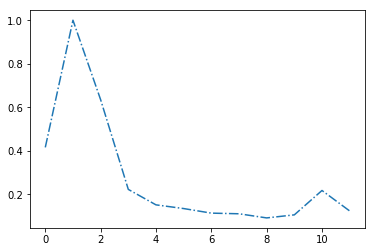

98 index,  time 31.32963


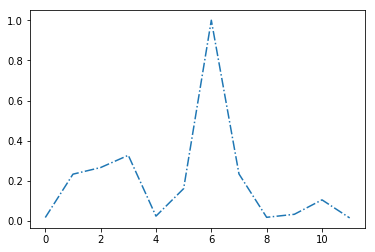

99 index,  time 31.996480000000002


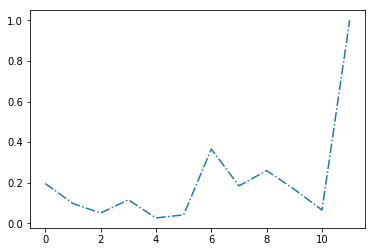

In [29]:
for i in range(100):
    print(i, 'index, ', 'time', duration.cumsum()[i])
    plt.plot(pitches[i], '-.')
    plt.show()

100 index,  time 32.32777


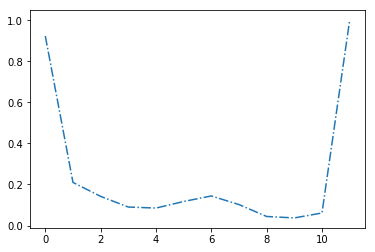

101 index,  time 32.6787


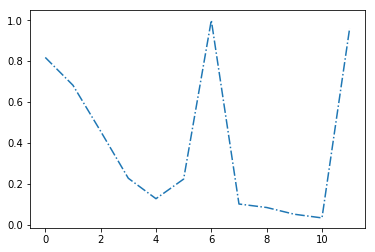

102 index,  time 32.866949999999996


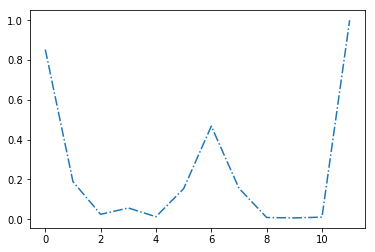

103 index,  time 33.181779999999996


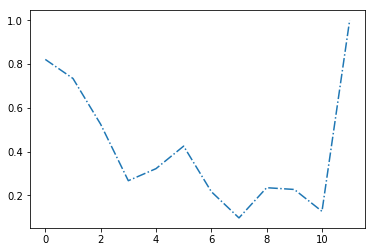

104 index,  time 33.30844999999999


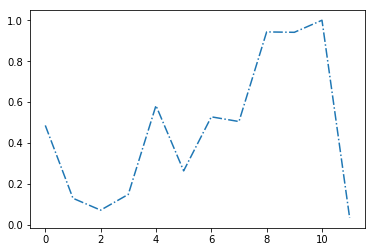

105 index,  time 33.82019999999999


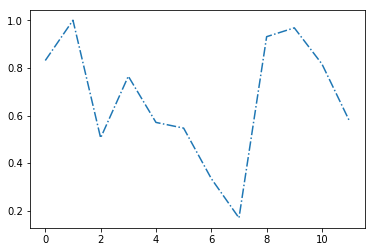

106 index,  time 33.994299999999996


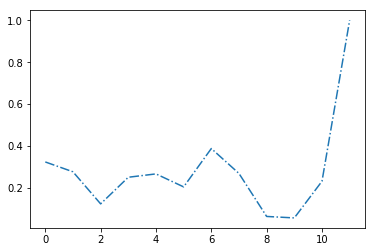

107 index,  time 34.17529999999999


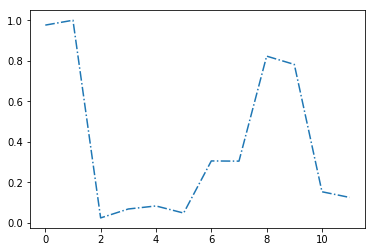

108 index,  time 34.30214999999999


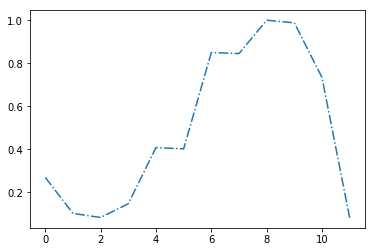

109 index,  time 34.52282999999999


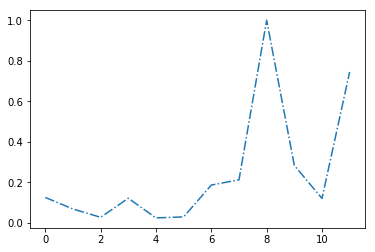

110 index,  time 34.656569999999995


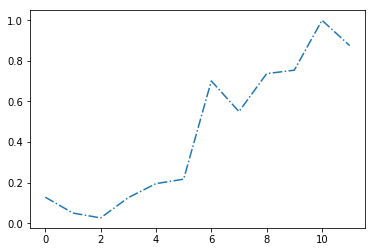

111 index,  time 34.992619999999995


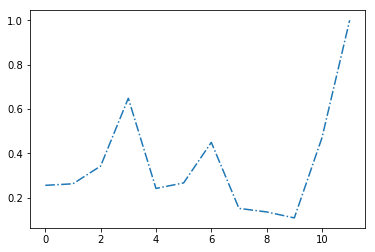

112 index,  time 35.19452


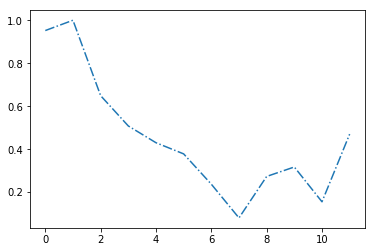

113 index,  time 35.28264


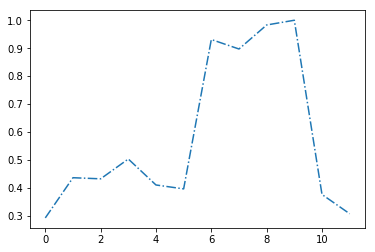

114 index,  time 35.66005


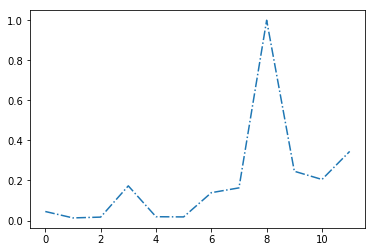

115 index,  time 35.98273


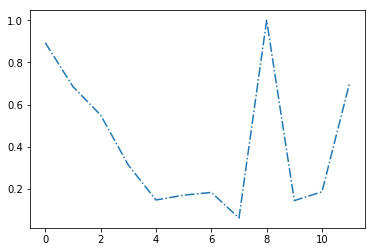

116 index,  time 36.227489999999996


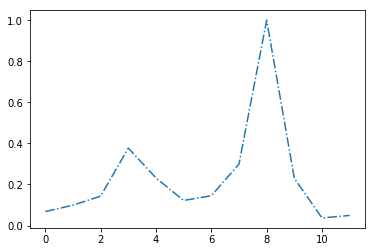

117 index,  time 36.33324999999999


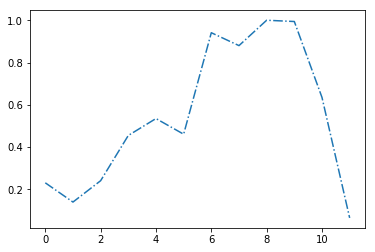

118 index,  time 36.603539999999995


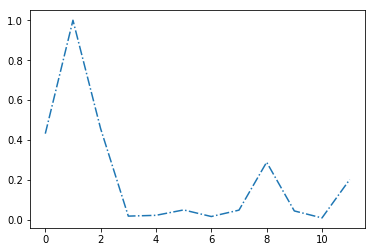

119 index,  time 36.8805


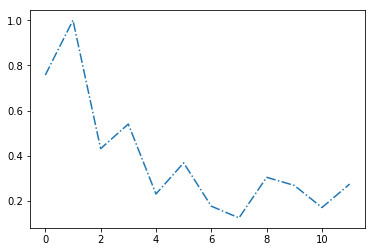

120 index,  time 36.99265


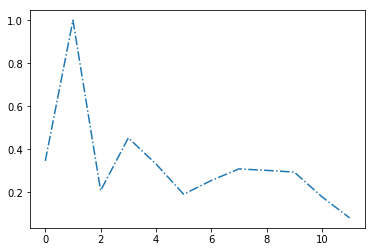

121 index,  time 37.290839999999996


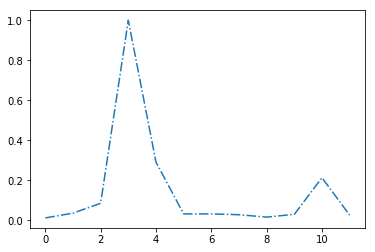

122 index,  time 37.66298999999999


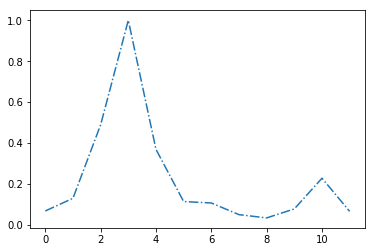

123 index,  time 37.83237999999999


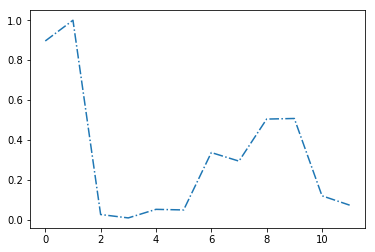

124 index,  time 37.94539999999999


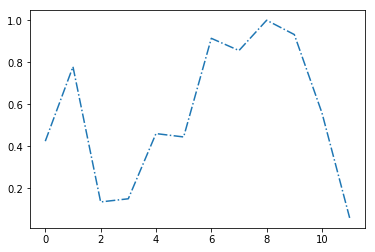

125 index,  time 38.30684999999999


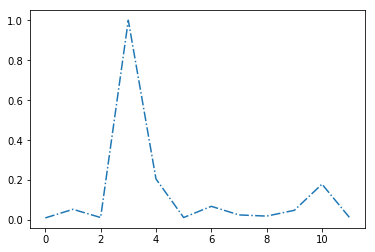

126 index,  time 38.62666999999999


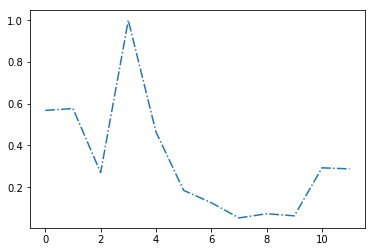

127 index,  time 38.93859999999999


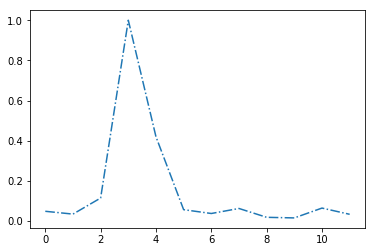

128 index,  time 39.108989999999984


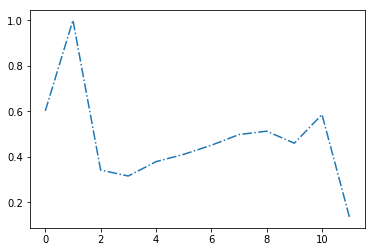

129 index,  time 39.336379999999984


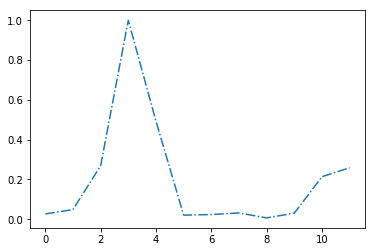

130 index,  time 39.62712999999999


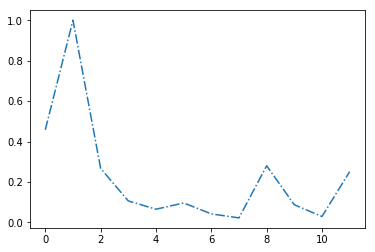

131 index,  time 39.92073999999999


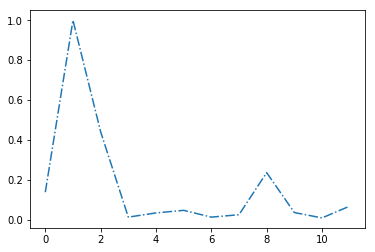

132 index,  time 40.332979999999985


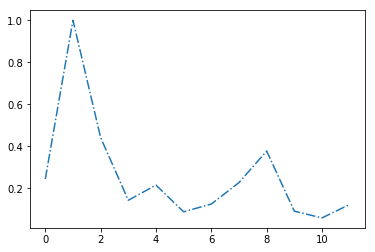

133 index,  time 40.583319999999986


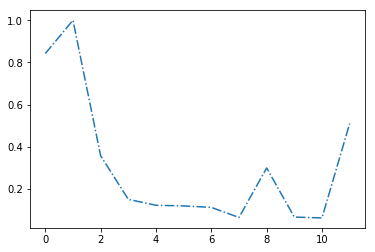

134 index,  time 40.750579999999985


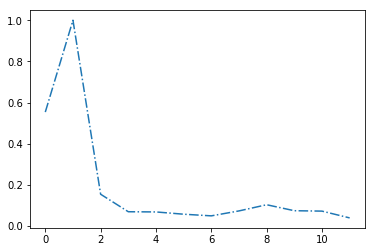

135 index,  time 41.11987999999999


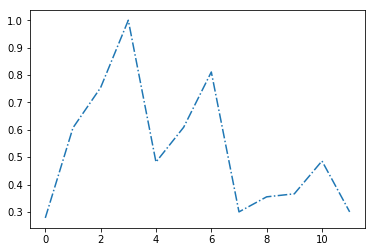

136 index,  time 41.331439999999986


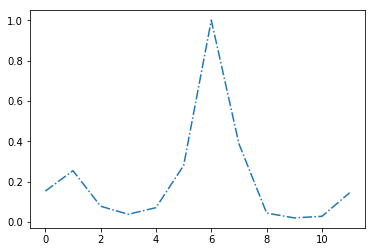

137 index,  time 41.637289999999986


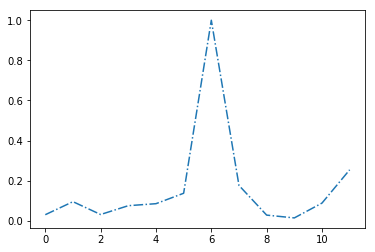

138 index,  time 41.958699999999986


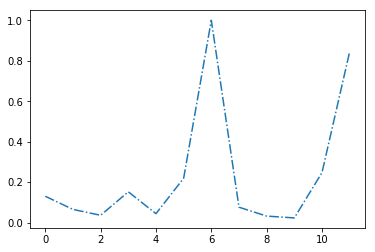

139 index,  time 42.177379999999985


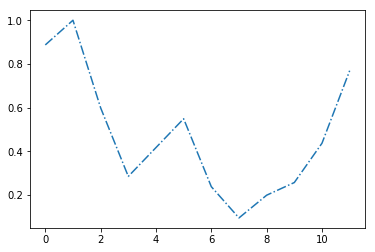

140 index,  time 42.313709999999986


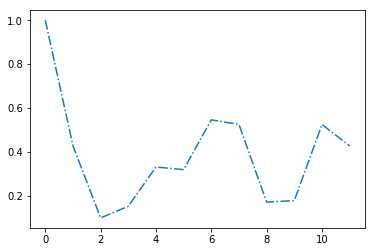

141 index,  time 42.604959999999984


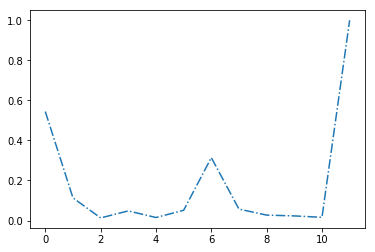

142 index,  time 42.94627999999999


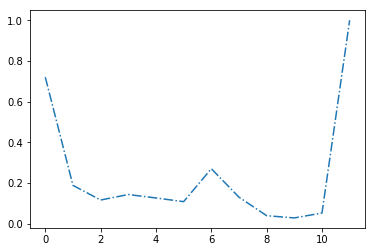

143 index,  time 43.34223999999999


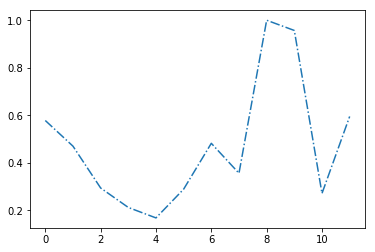

144 index,  time 43.60114999999999


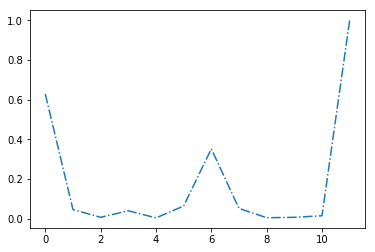

145 index,  time 43.94481999999999


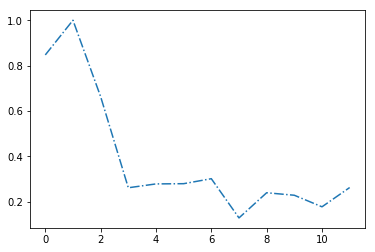

146 index,  time 44.34993999999999


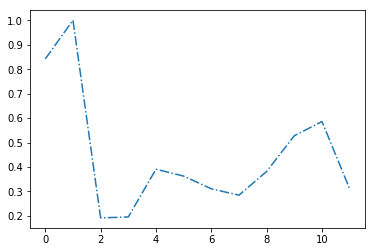

147 index,  time 44.66354999999999


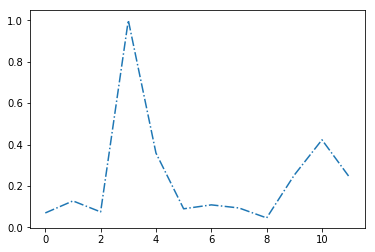

148 index,  time 44.935569999999984


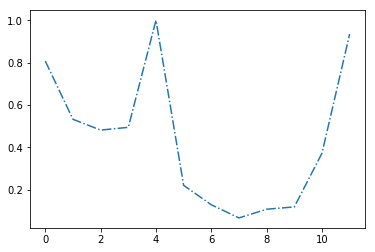

149 index,  time 45.278019999999984


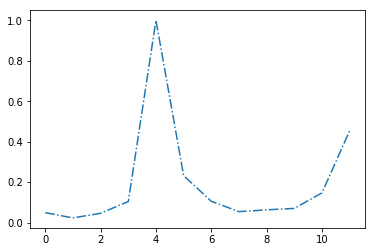

150 index,  time 45.633389999999984


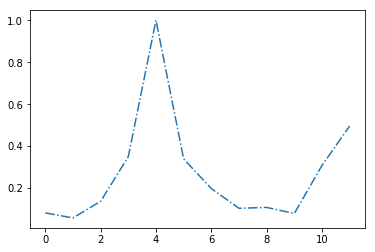

151 index,  time 45.94132999999999


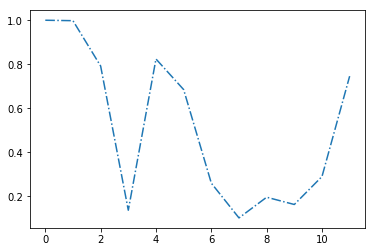

152 index,  time 46.297569999999986


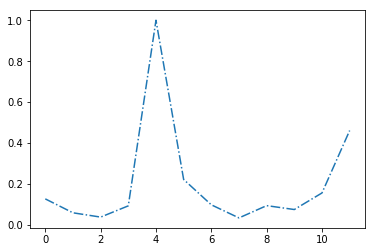

153 index,  time 46.505639999999985


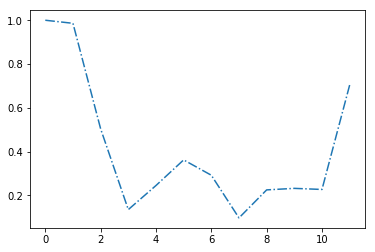

154 index,  time 46.67094999999998


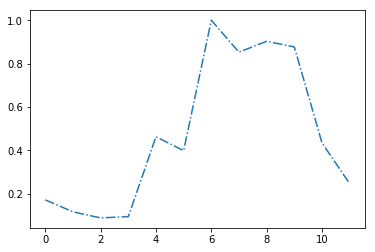

155 index,  time 46.93996999999998


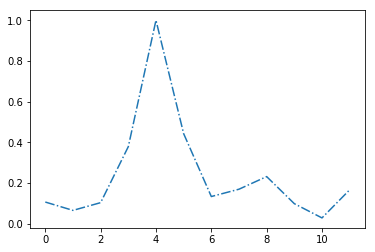

156 index,  time 47.28985999999998


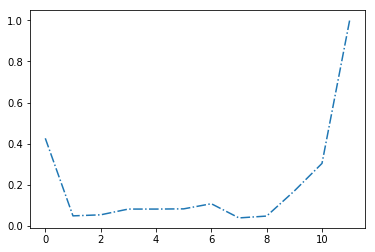

157 index,  time 47.582239999999985


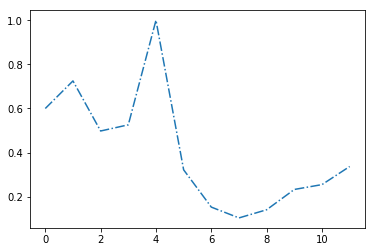

158 index,  time 47.96763999999998


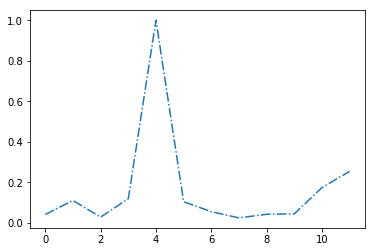

159 index,  time 48.29765999999998


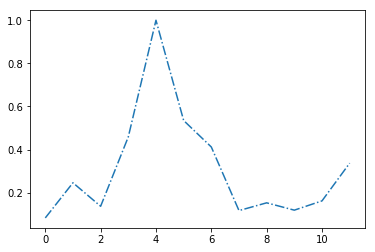

160 index,  time 48.65783999999998


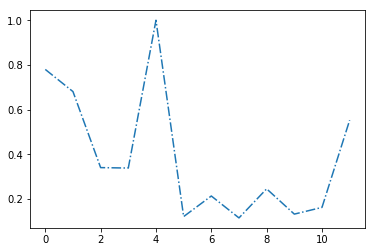

161 index,  time 48.95828999999998


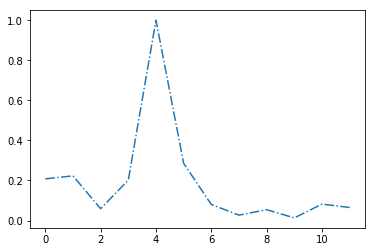

162 index,  time 49.22667999999997


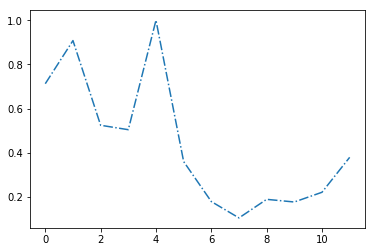

163 index,  time 49.63647999999997


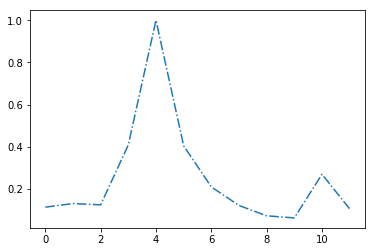

164 index,  time 49.96590999999997


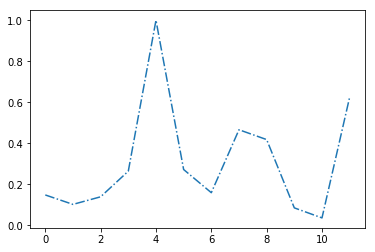

165 index,  time 50.31610999999997


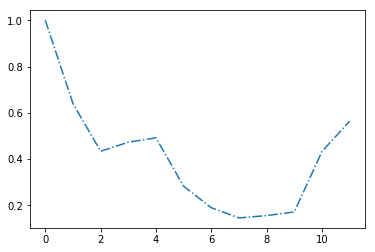

166 index,  time 50.610439999999976


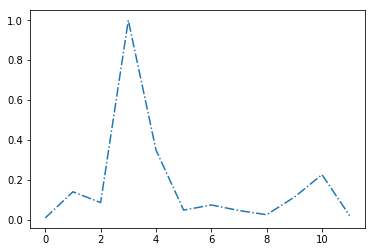

167 index,  time 50.94521999999998


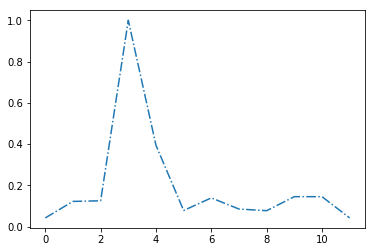

168 index,  time 51.31959999999998


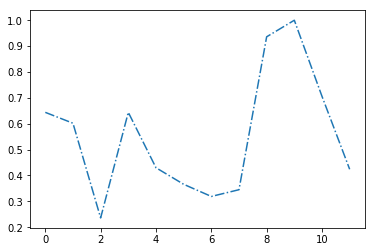

169 index,  time 51.62580999999998


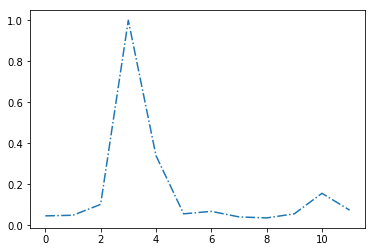

170 index,  time 51.84213999999998


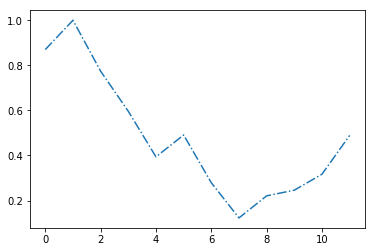

171 index,  time 51.93991999999998


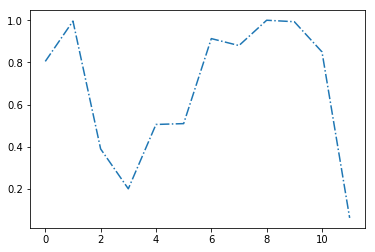

172 index,  time 52.13918999999998


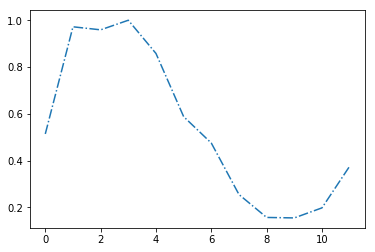

173 index,  time 52.32090999999998


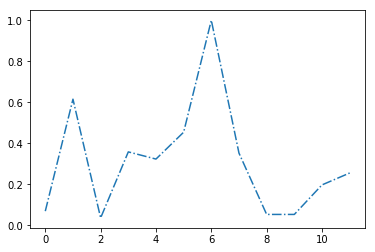

174 index,  time 52.635059999999974


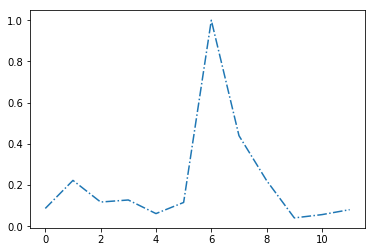

175 index,  time 53.010799999999975


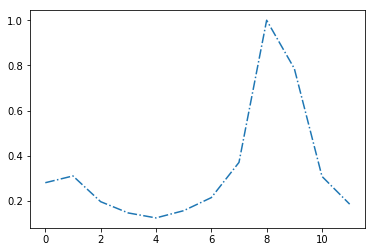

176 index,  time 53.32635999999997


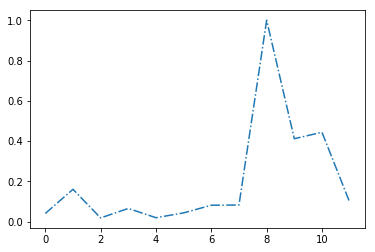

177 index,  time 53.655159999999974


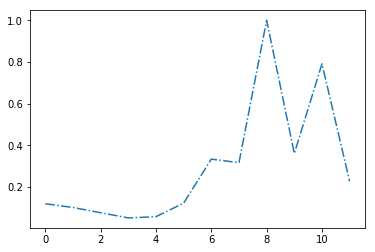

178 index,  time 53.84712999999997


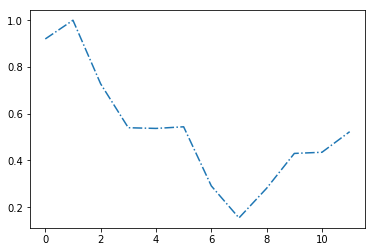

179 index,  time 53.99837999999997


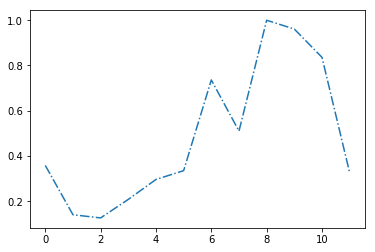

180 index,  time 54.309259999999966


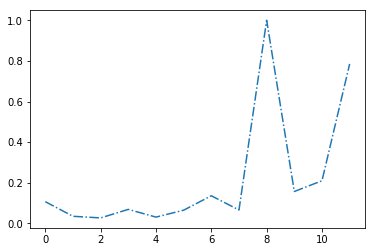

181 index,  time 54.45964999999997


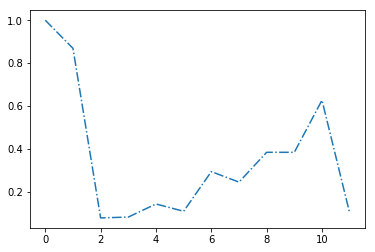

182 index,  time 54.652579999999965


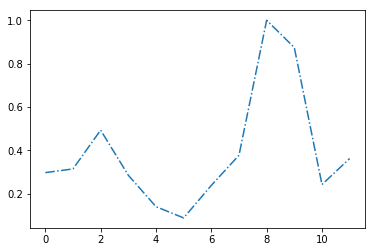

183 index,  time 54.82831999999996


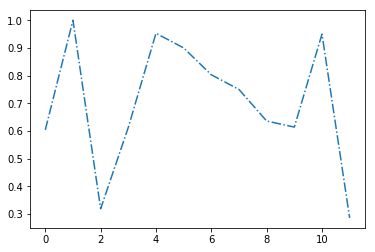

184 index,  time 54.928589999999964


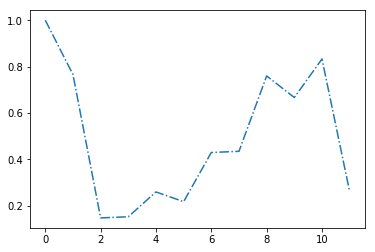

185 index,  time 55.00912999999996


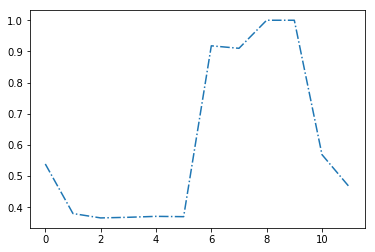

186 index,  time 55.24463999999996


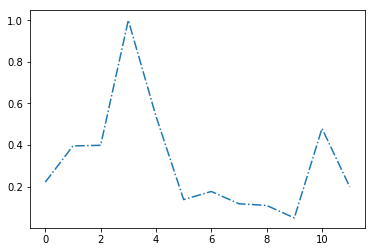

187 index,  time 55.675209999999964


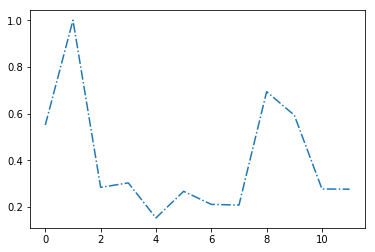

188 index,  time 55.98881999999996


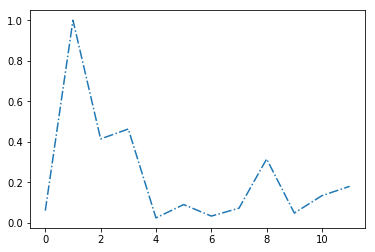

189 index,  time 56.326959999999964


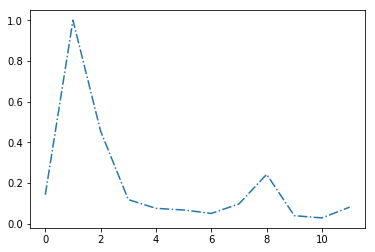

190 index,  time 56.669949999999965


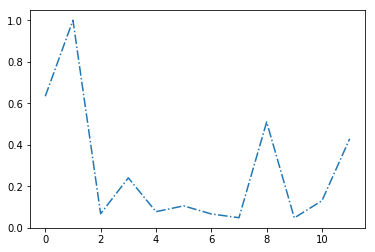

191 index,  time 56.92931999999996


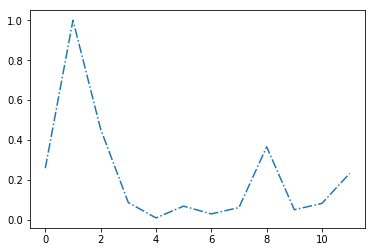

192 index,  time 57.11883999999996


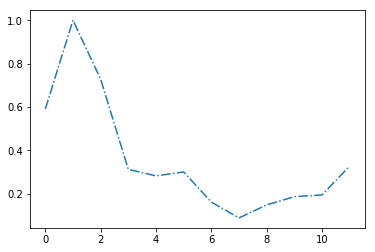

193 index,  time 57.33185999999996


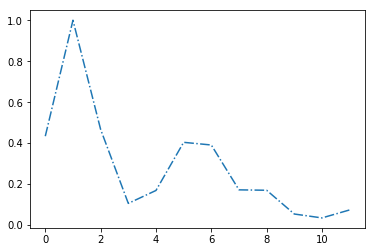

194 index,  time 57.53040999999996


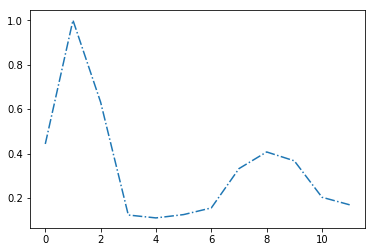

195 index,  time 57.66206999999996


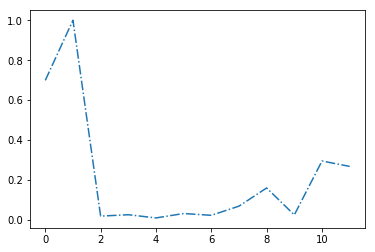

196 index,  time 57.984609999999954


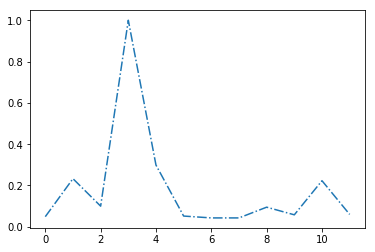

197 index,  time 58.34610999999995


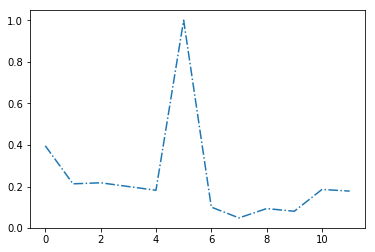

198 index,  time 58.659619999999954


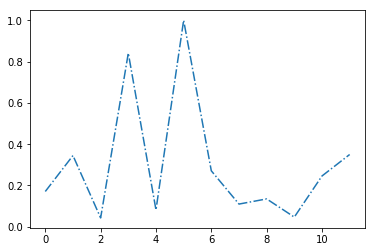

199 index,  time 58.99090999999996


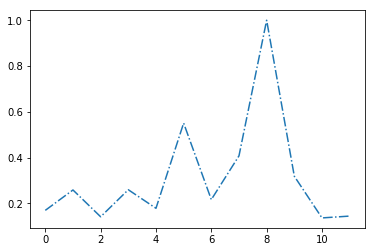

In [42]:
for i in range(100,200):
    print(i, 'index, ', 'time', duration.cumsum()[i])
    plt.plot(pitches[i], '-.')
    plt.show()

200 index,  time 59.25104999999996


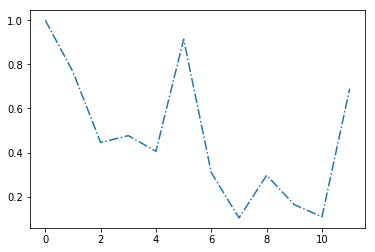

201 index,  time 59.36787999999996


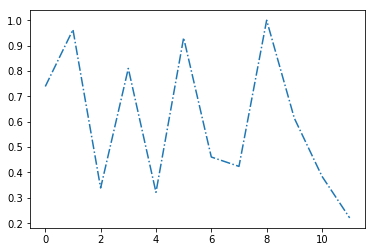

202 index,  time 59.601669999999956


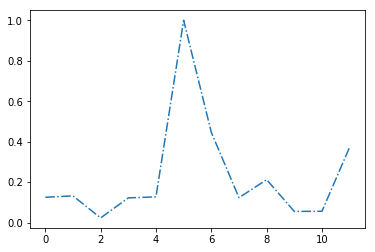

203 index,  time 59.85595999999995


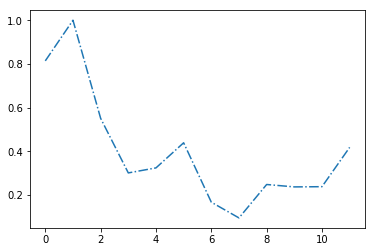

204 index,  time 59.96561999999995


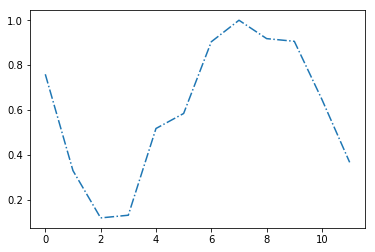

205 index,  time 60.324889999999954


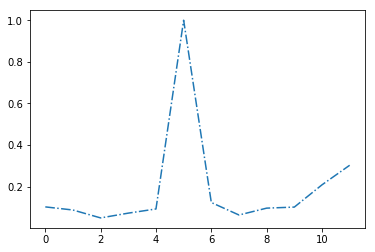

206 index,  time 60.66815999999995


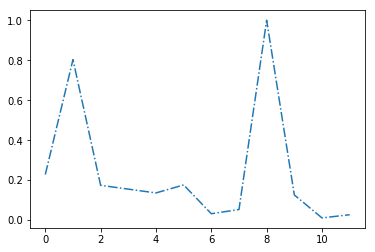

207 index,  time 60.78466999999995


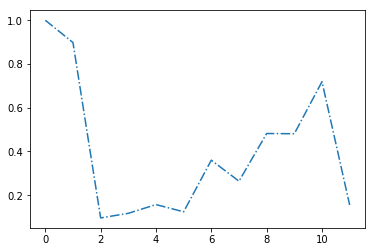

208 index,  time 60.97482999999995


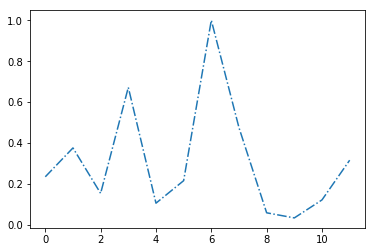

209 index,  time 61.34121999999995


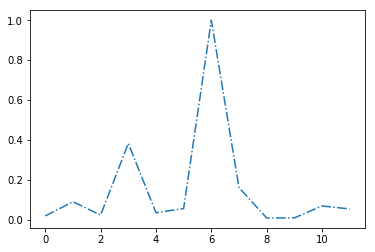

210 index,  time 61.49881999999995


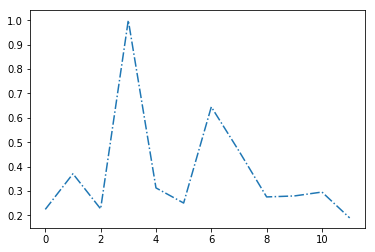

211 index,  time 61.57827999999995


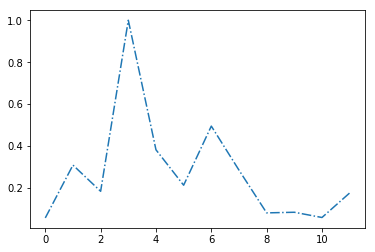

212 index,  time 61.97986999999995


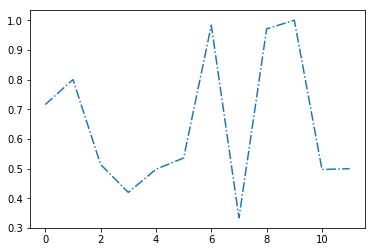

213 index,  time 62.26498999999995


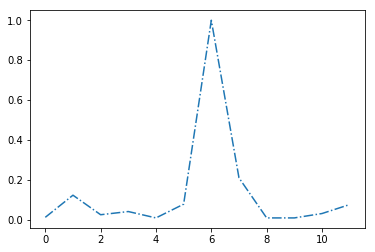

214 index,  time 62.469069999999945


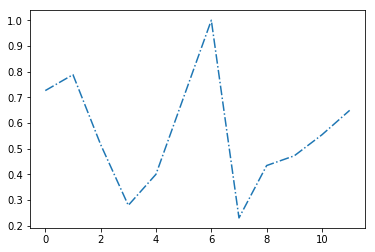

215 index,  time 62.67092999999995


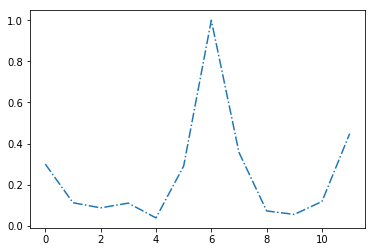

216 index,  time 62.92013999999995


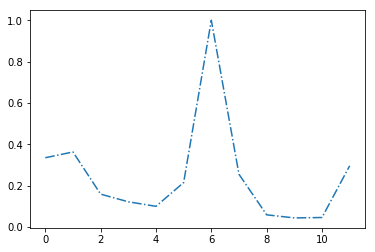

217 index,  time 63.146629999999945


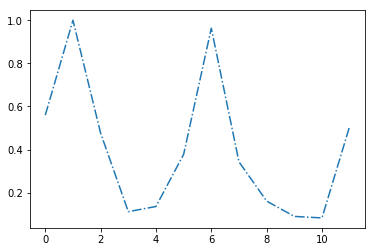

218 index,  time 63.63909999999994


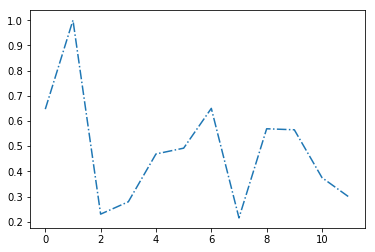

219 index,  time 63.791979999999946


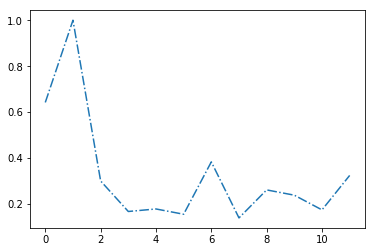

220 index,  time 64.31945999999995


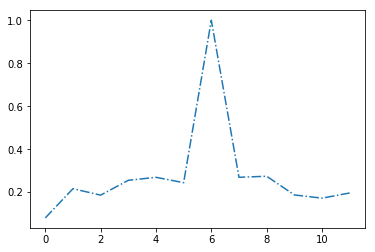

221 index,  time 64.61414999999995


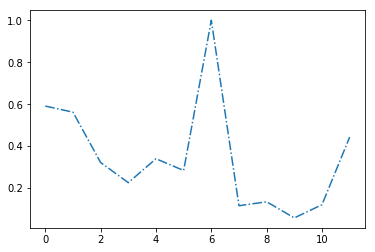

222 index,  time 64.89387999999995


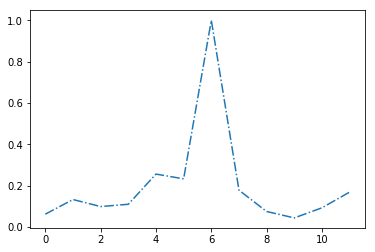

223 index,  time 65.33763999999995


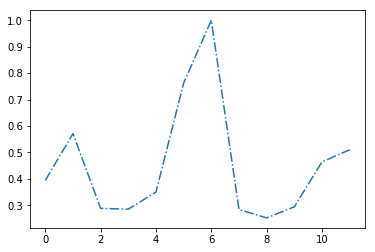

224 index,  time 65.71314999999996


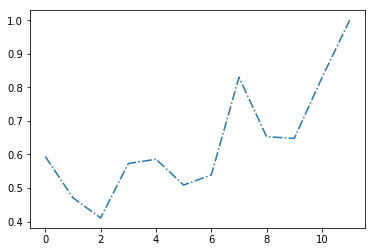

225 index,  time 66.55423999999995


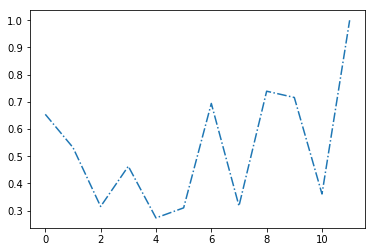

226 index,  time 66.98929999999996


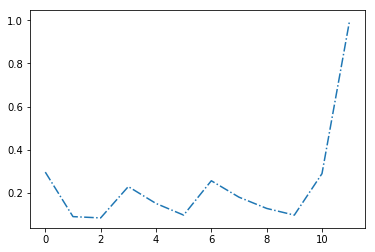

227 index,  time 67.08752999999996


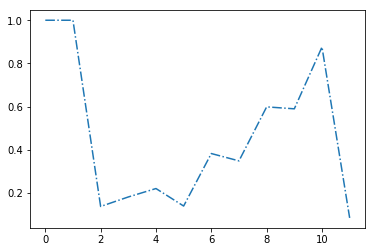

228 index,  time 67.63156999999995


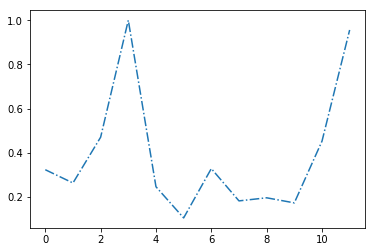

229 index,  time 67.79124999999995


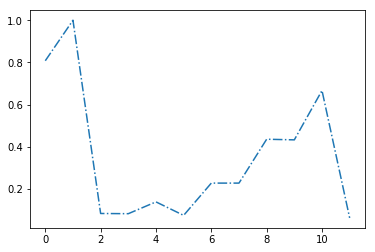

230 index,  time 67.94095999999995


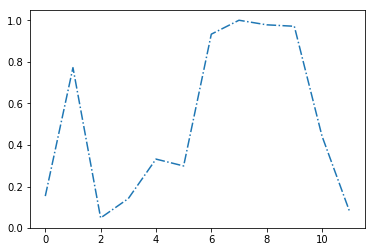

231 index,  time 68.16603999999995


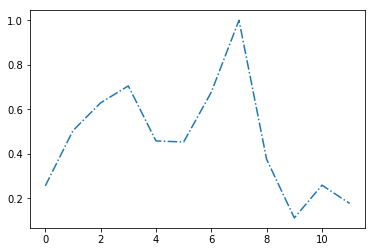

232 index,  time 68.35628999999996


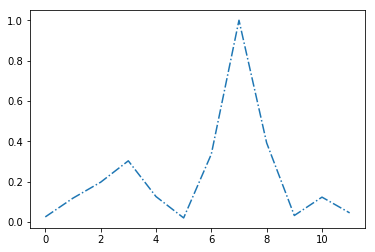

233 index,  time 68.66667999999996


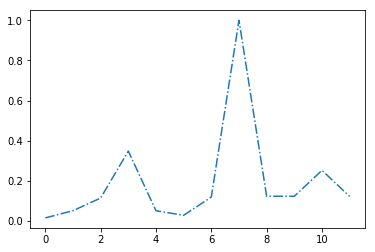

234 index,  time 69.29456999999995


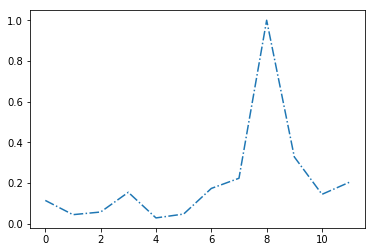

235 index,  time 69.59601999999995


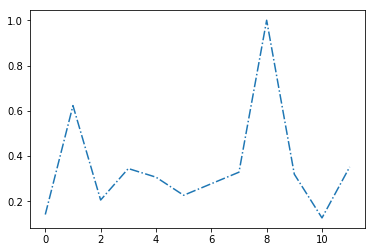

236 index,  time 69.74517999999995


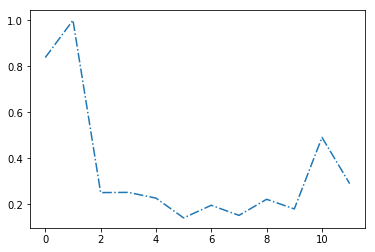

237 index,  time 70.22957999999994


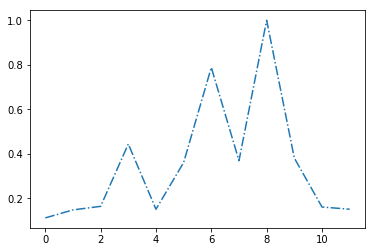

238 index,  time 70.67075999999994


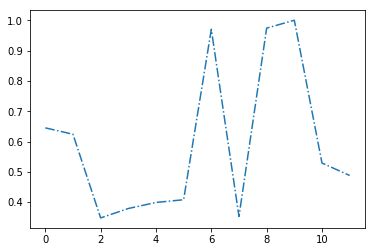

239 index,  time 71.01175999999994


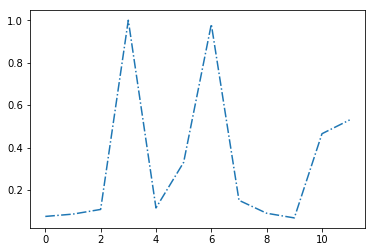

240 index,  time 71.24685999999994


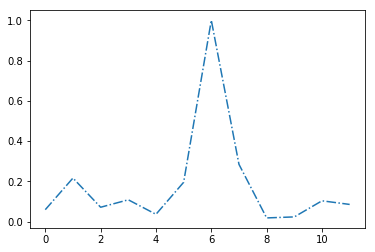

241 index,  time 71.96277999999994


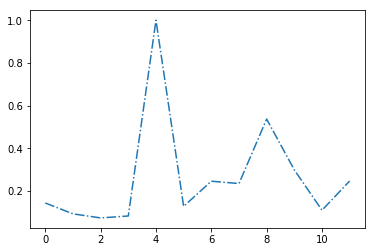

242 index,  time 72.30617999999994


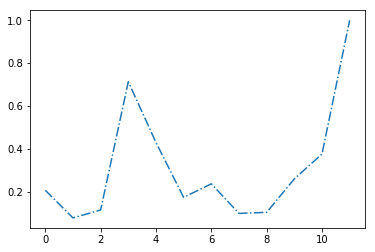

243 index,  time 72.96807999999994


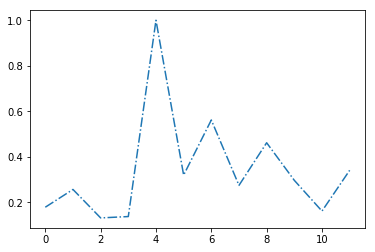

244 index,  time 73.17043999999994


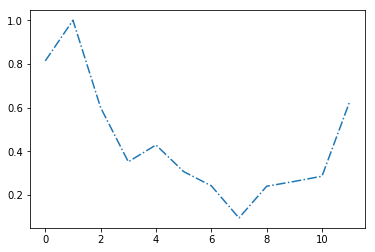

245 index,  time 73.33379999999994


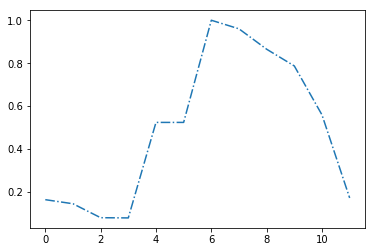

246 index,  time 73.65501999999994


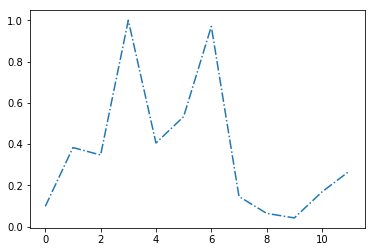

247 index,  time 73.78077999999994


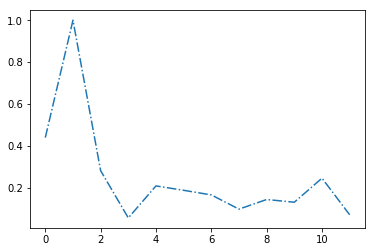

248 index,  time 74.62077999999994


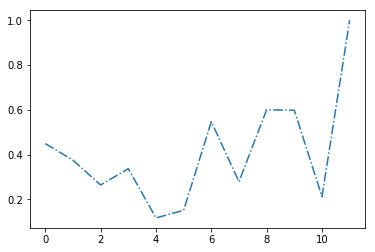

249 index,  time 75.00127999999994


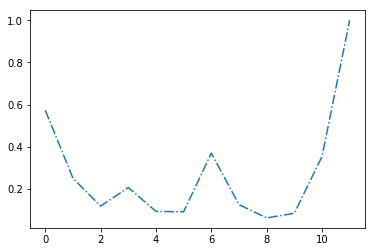

250 index,  time 75.17660999999994


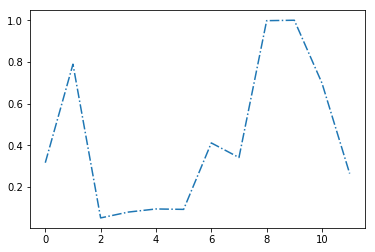

251 index,  time 75.29683999999995


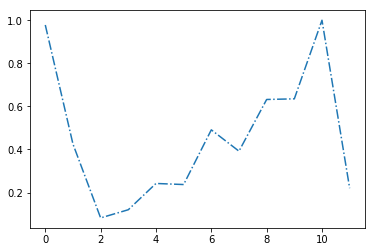

252 index,  time 75.55225999999995


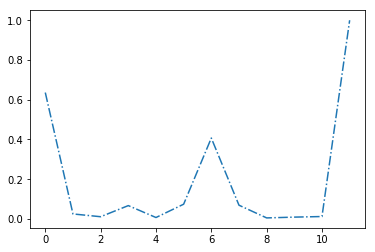

253 index,  time 75.96926999999995


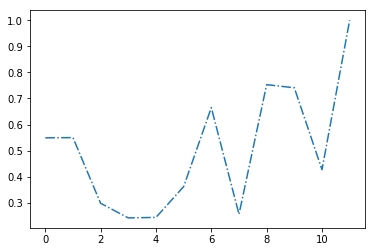

254 index,  time 76.34731999999995


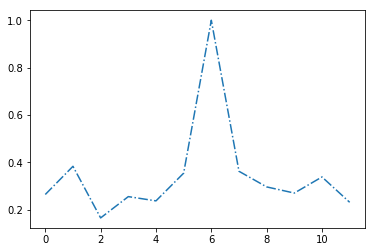

255 index,  time 76.64359999999995


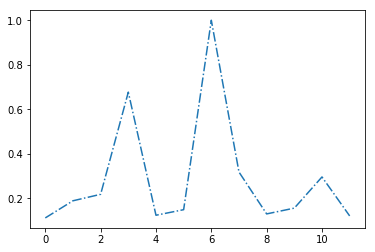

256 index,  time 77.29978999999994


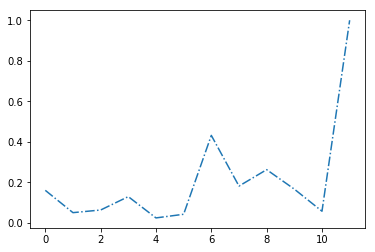

257 index,  time 78.11978999999994


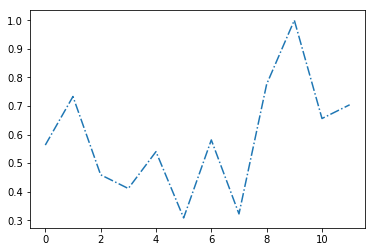

258 index,  time 78.19515999999994


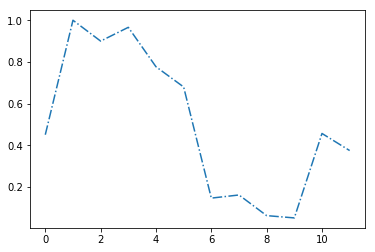

259 index,  time 78.47066999999994


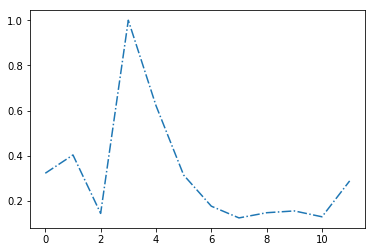

260 index,  time 78.64368999999994


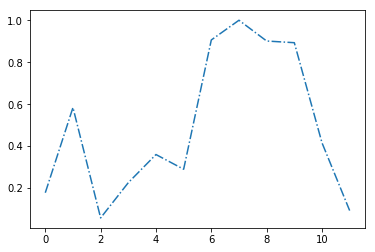

261 index,  time 78.97261999999994


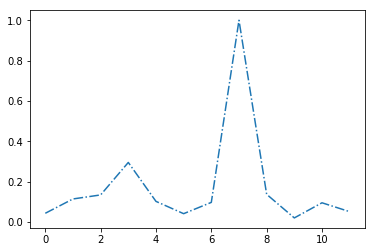

262 index,  time 79.32513999999993


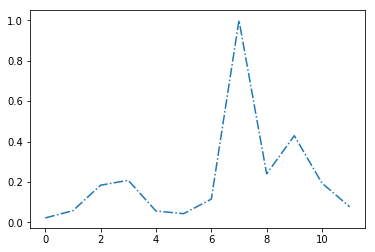

263 index,  time 79.96962999999994


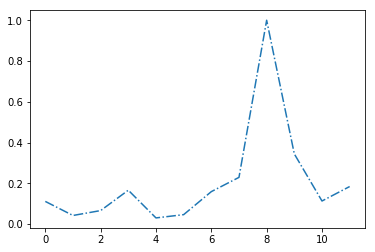

264 index,  time 80.18468999999993


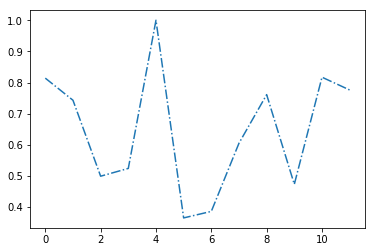

265 index,  time 80.31194999999994


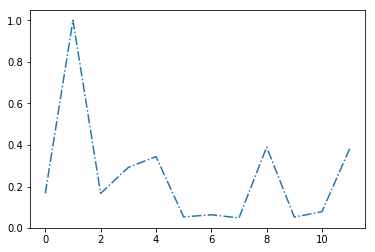

266 index,  time 80.83543999999993


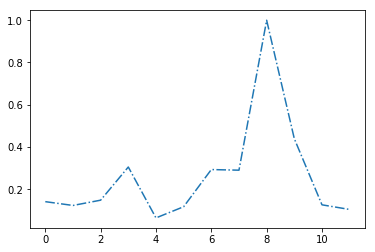

267 index,  time 80.97398999999993


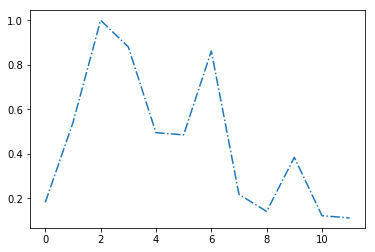

268 index,  time 81.33276999999993


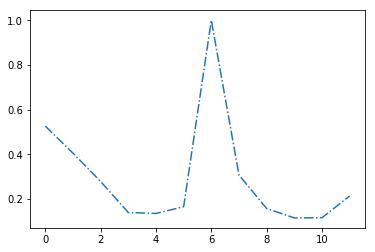

269 index,  time 81.90188999999992


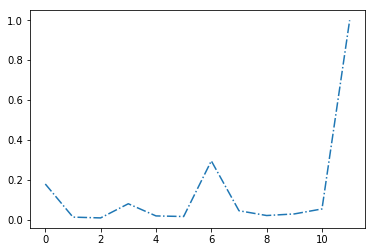

270 index,  time 82.08859999999993


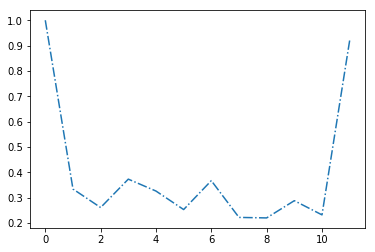

271 index,  time 82.44079999999992


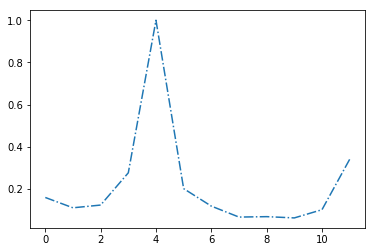

272 index,  time 82.67018999999992


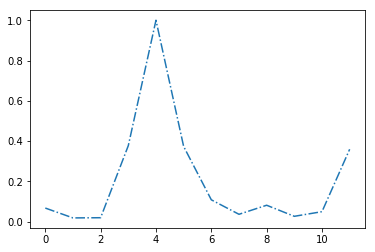

273 index,  time 83.00569999999992


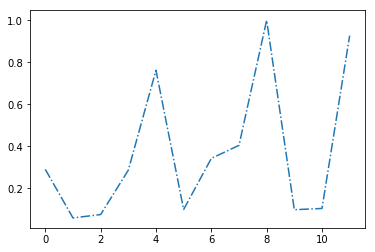

274 index,  time 83.12011999999991


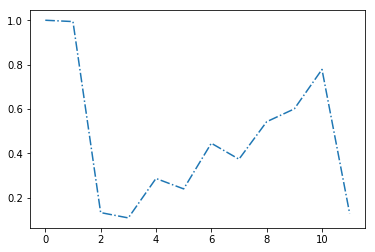

275 index,  time 83.30750999999991


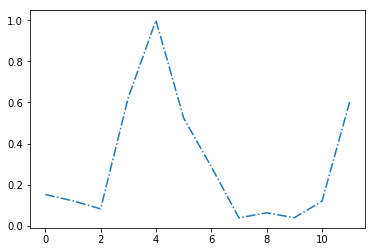

276 index,  time 83.66882999999991


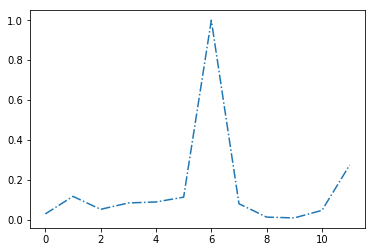

277 index,  time 83.97544999999991


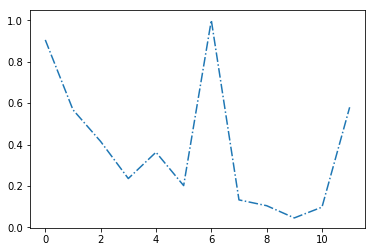

278 index,  time 84.3342299999999


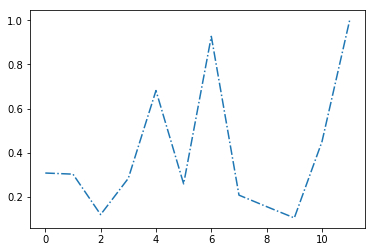

279 index,  time 84.6559099999999


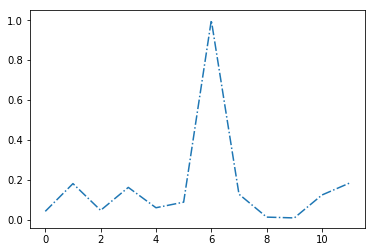

280 index,  time 85.3369099999999


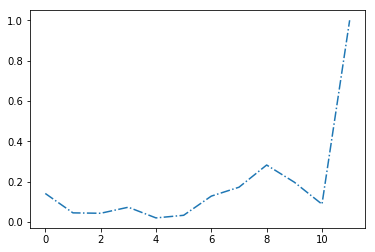

281 index,  time 85.6646699999999


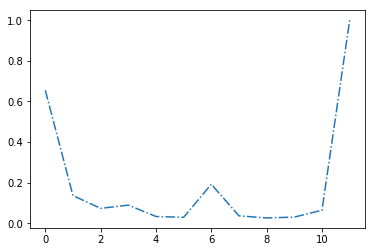

282 index,  time 85.99840999999991


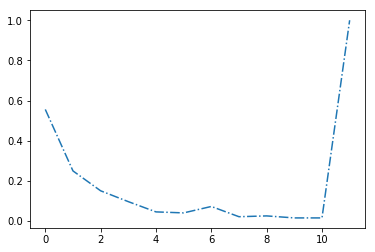

283 index,  time 86.3297899999999


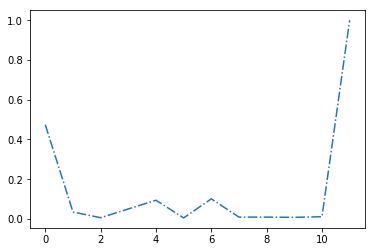

284 index,  time 86.6698799999999


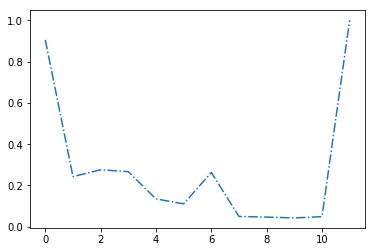

285 index,  time 86.9969999999999


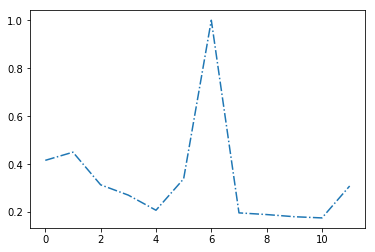

286 index,  time 87.3416299999999


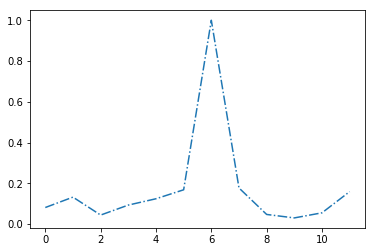

287 index,  time 88.0039399999999


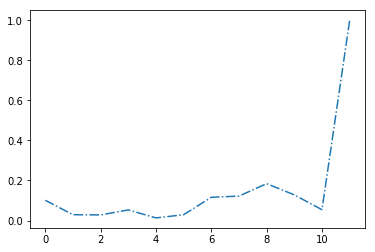

288 index,  time 88.3338299999999


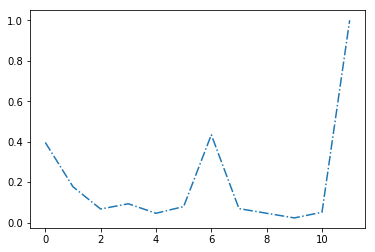

289 index,  time 88.67015999999991


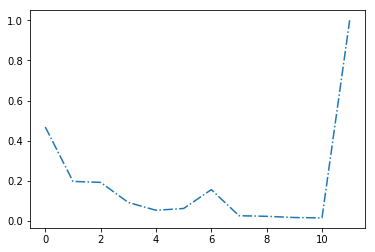

290 index,  time 89.00425999999992


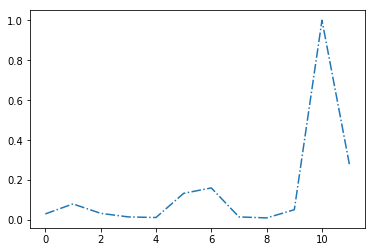

291 index,  time 89.29645999999991


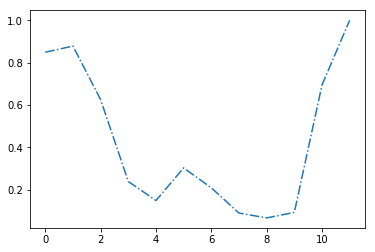

292 index,  time 89.67518999999992


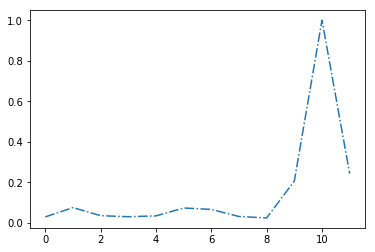

293 index,  time 90.00008999999991


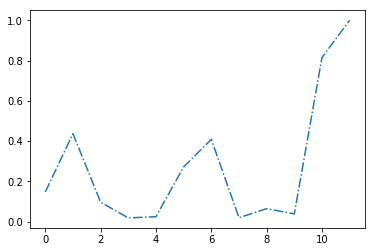

294 index,  time 90.34371999999992


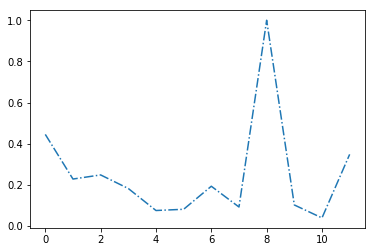

295 index,  time 90.66933999999992


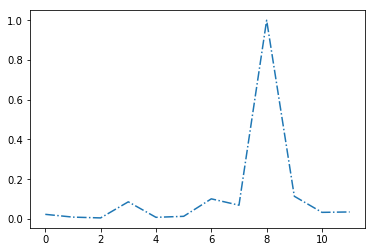

296 index,  time 90.99931999999993


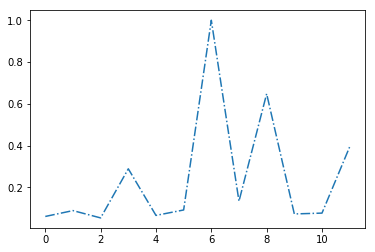

297 index,  time 91.33745999999992


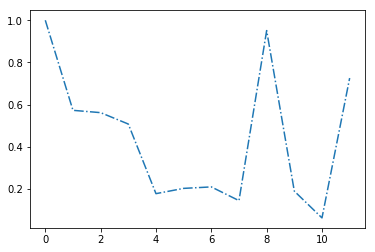

298 index,  time 91.66706999999992


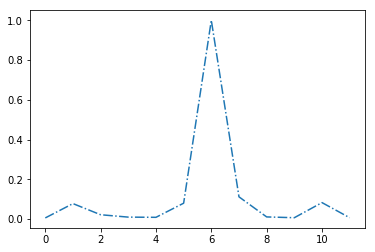

299 index,  time 92.00135999999992


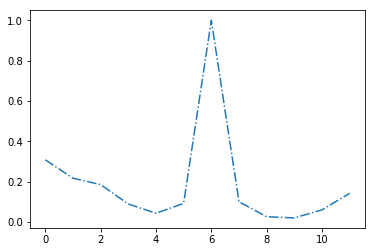

In [43]:
for i in range(200,300):
    print(i, 'index, ', 'time', duration.cumsum()[i])
    plt.plot(pitches[i], '-.')
    plt.show()

In [30]:
pitches[4]

array([0.133, 0.055, 0.066, 0.063, 0.056, 0.079, 1.   , 0.123, 0.156,
       0.081, 0.148, 0.786])

In [31]:
timbre = []
for i in segments:
    timbre.append(i['timbre'])
timbre = np.array(timbre)

In [32]:
# 归一化到0-1之间
k = 1/(timbre.max() - timbre.min())
b = 1*timbre.min()/(timbre.min() - timbre.max())
timbre = k * timbre + b

In [33]:
timbre.min(), timbre.max()

(0.0, 1.0)

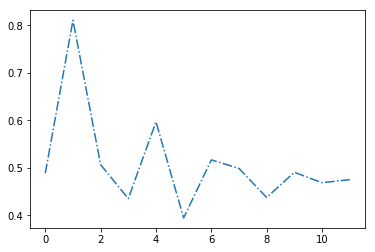

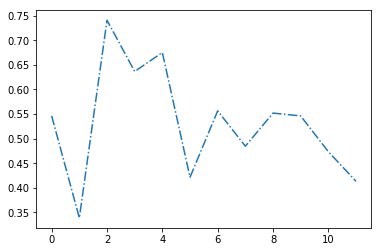

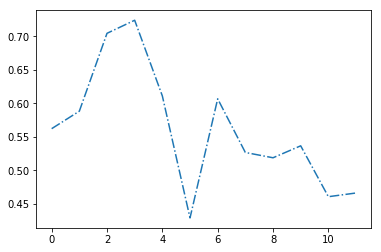

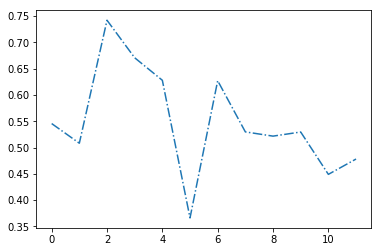

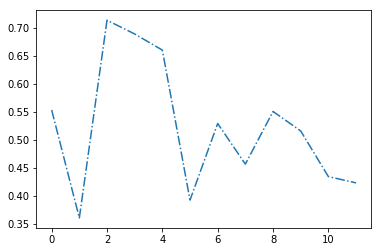

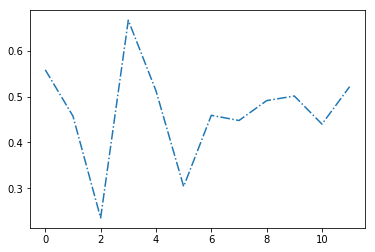

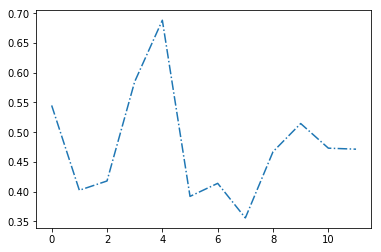

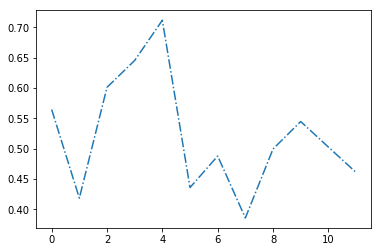

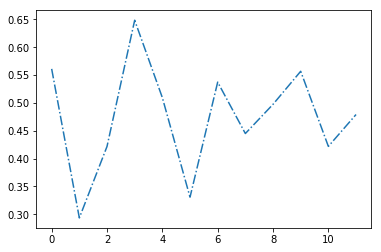

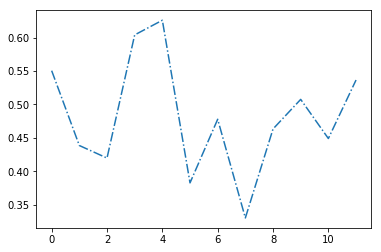

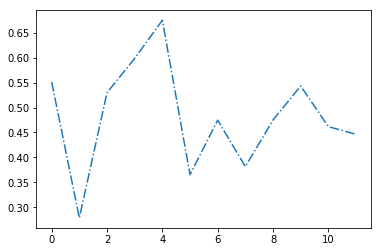

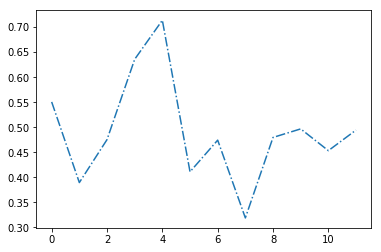

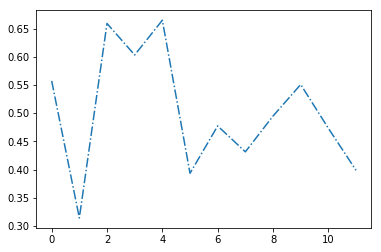

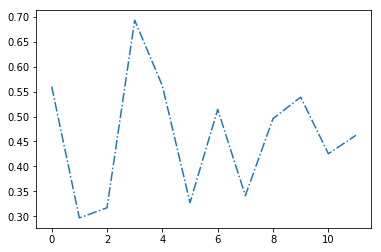

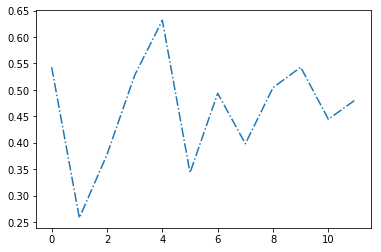

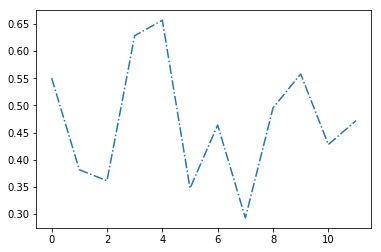

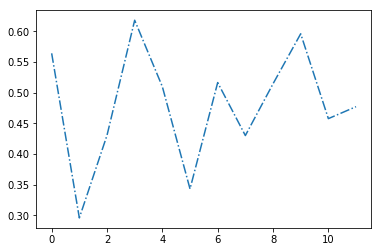

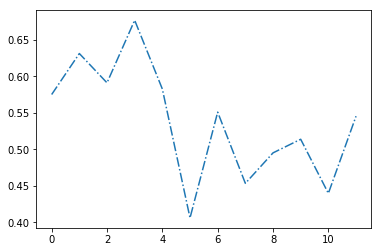

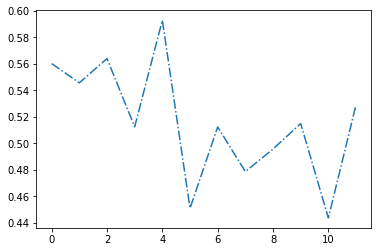

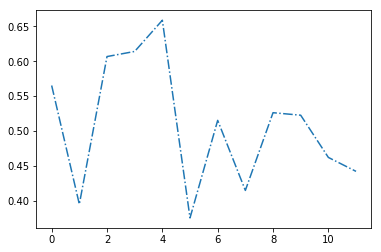

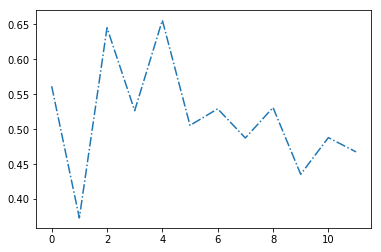

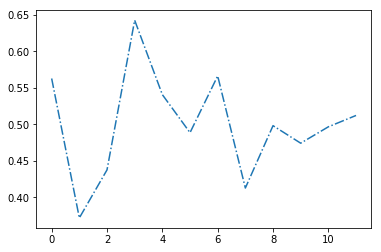

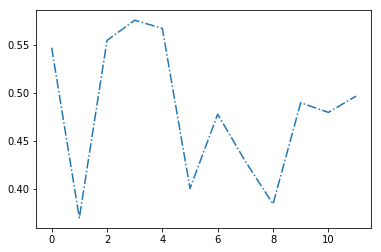

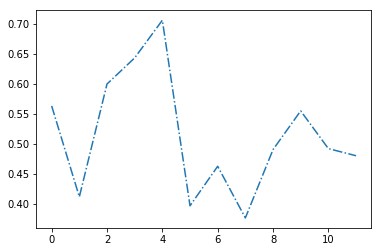

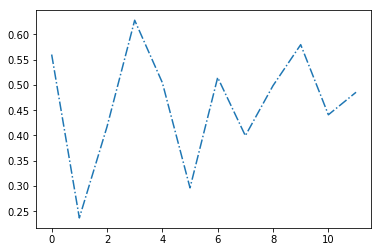

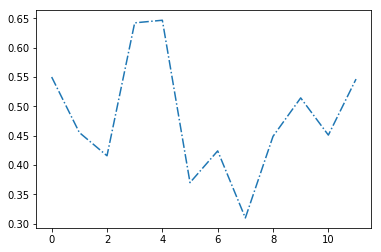

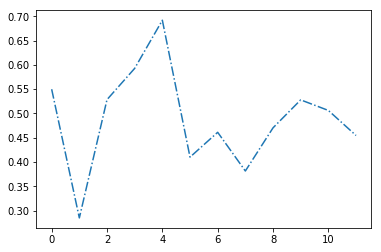

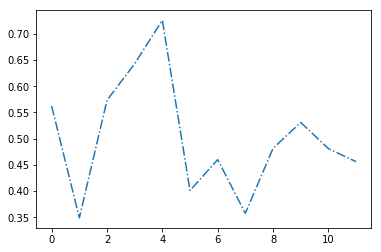

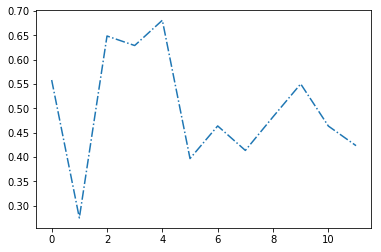

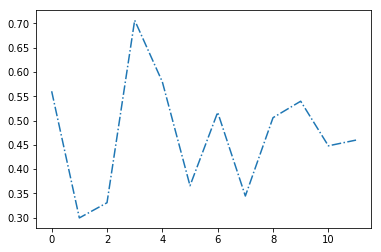

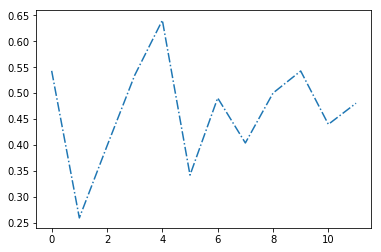

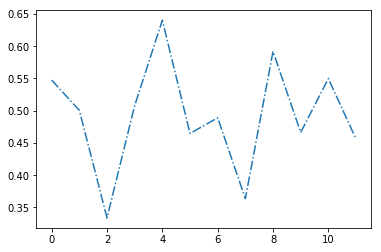

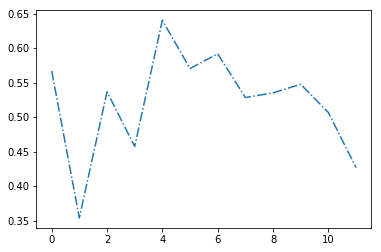

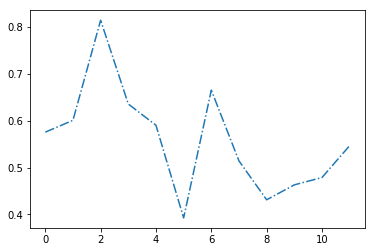

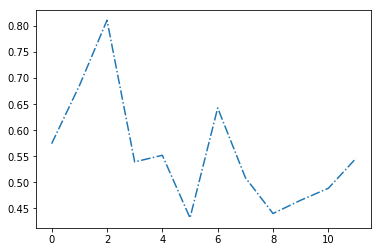

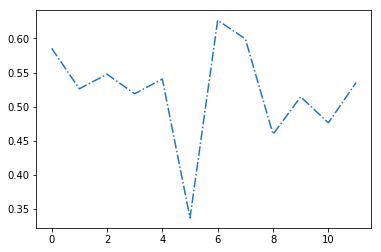

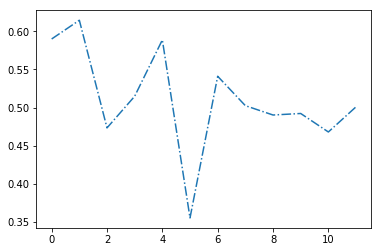

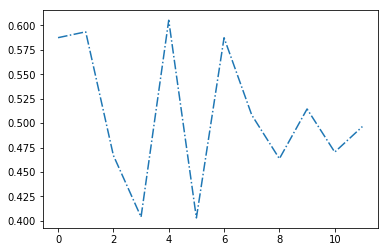

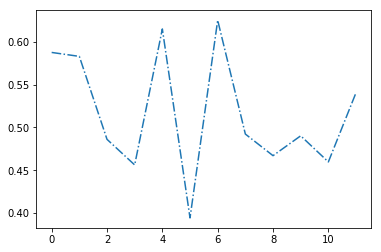

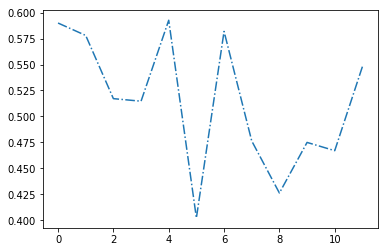

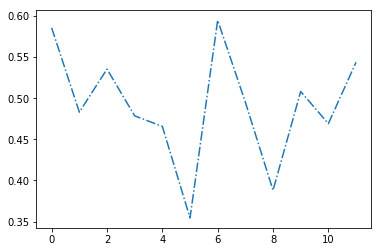

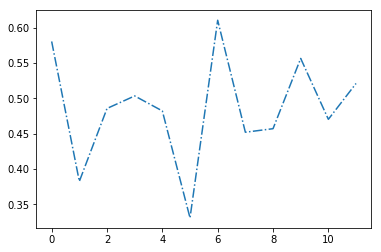

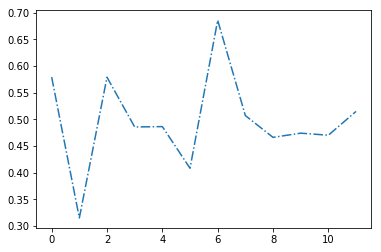

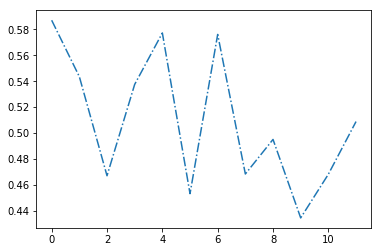

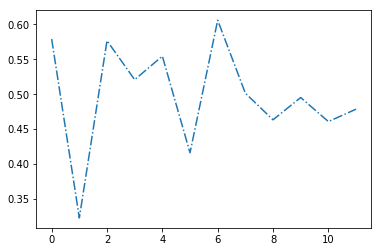

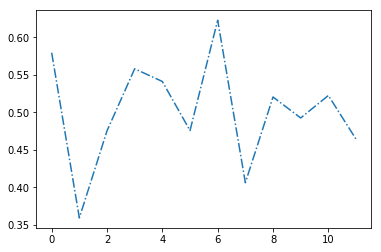

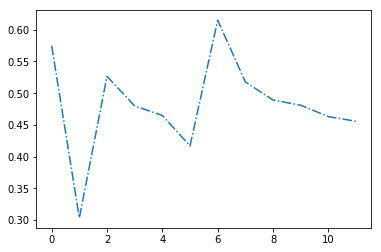

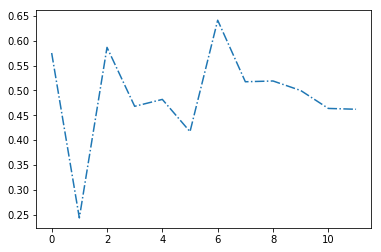

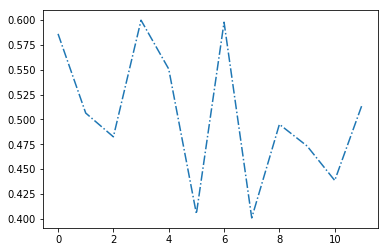

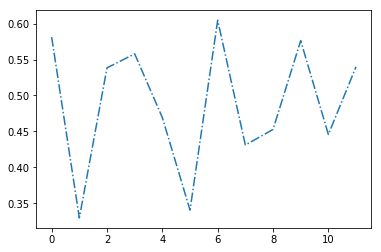

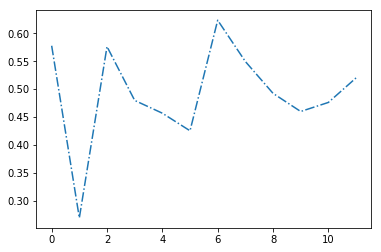

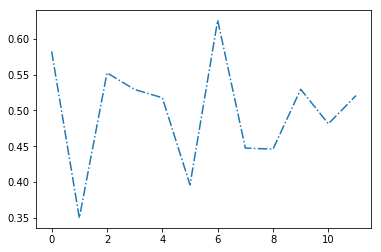

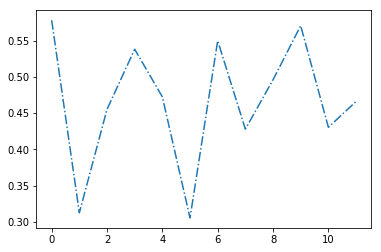

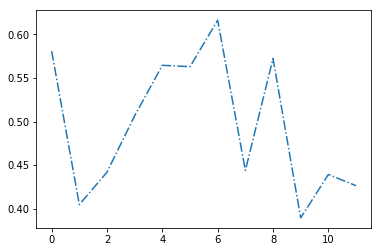

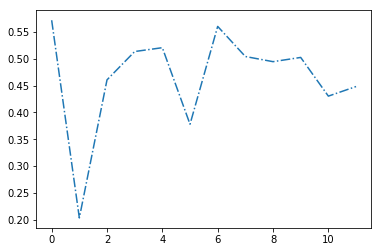

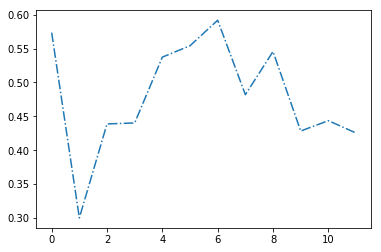

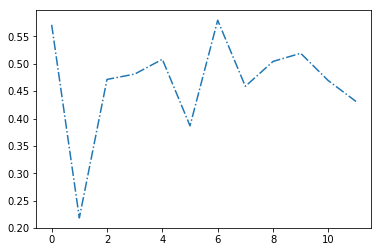

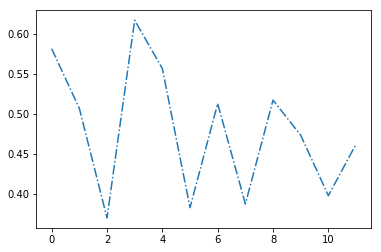

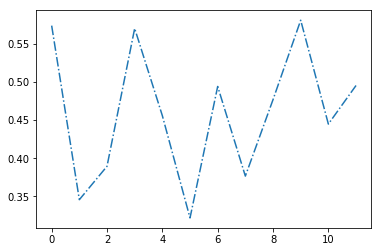

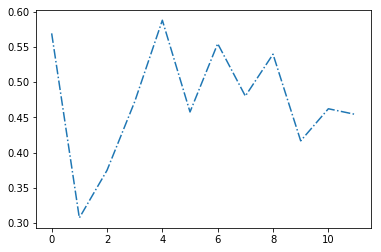

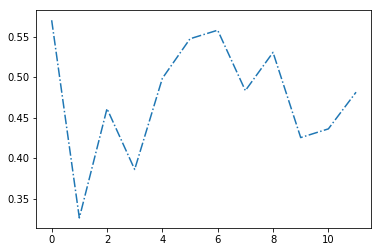

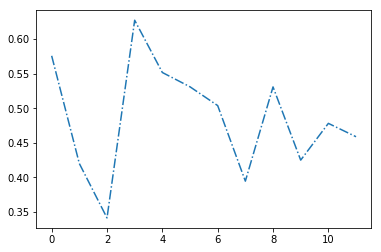

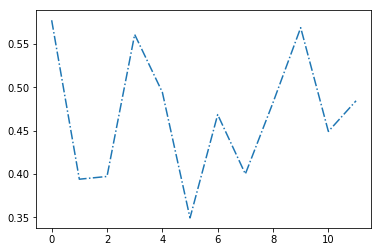

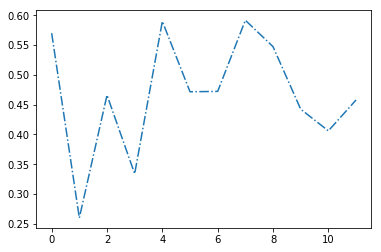

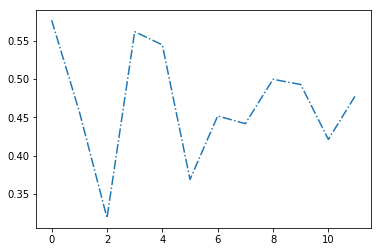

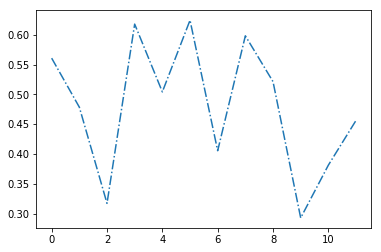

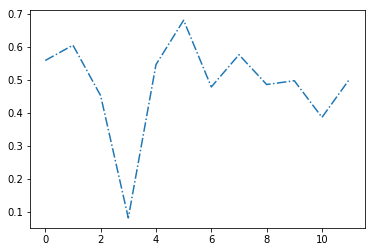

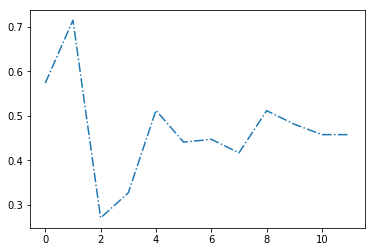

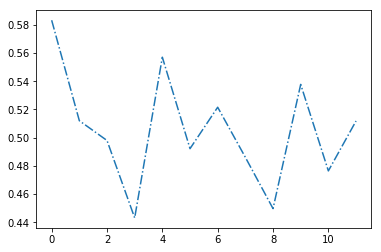

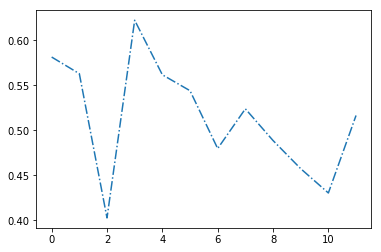

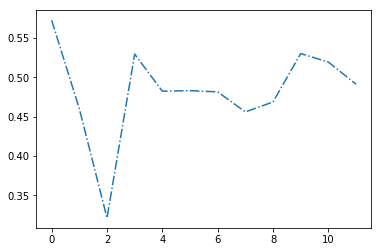

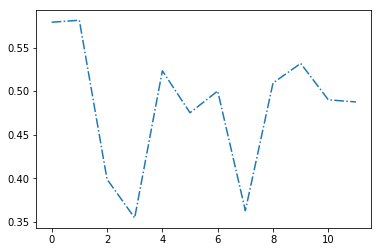

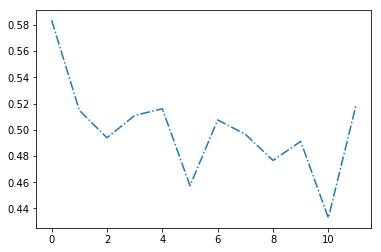

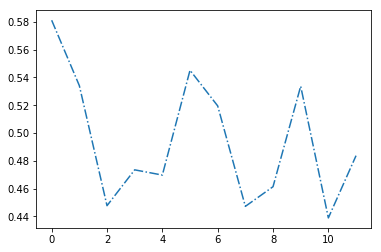

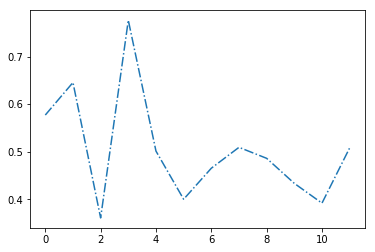

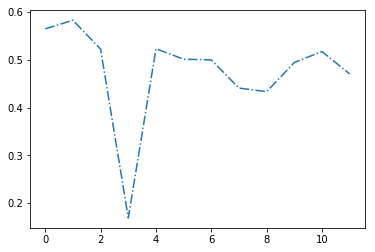

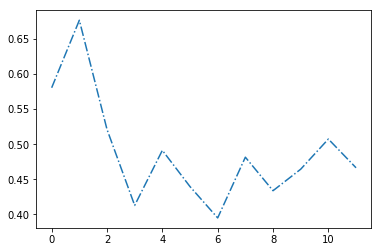

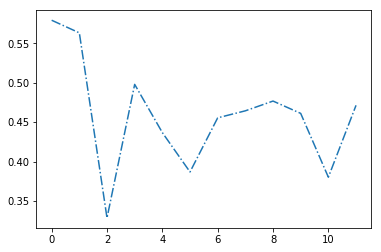

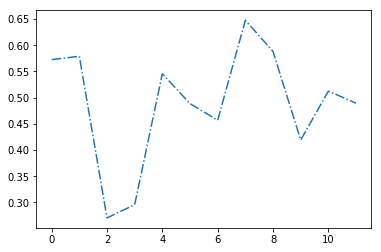

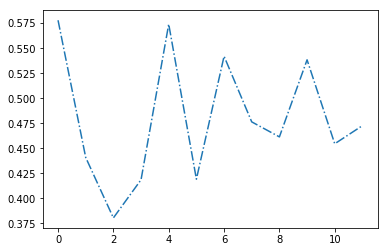

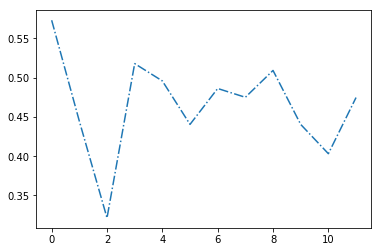

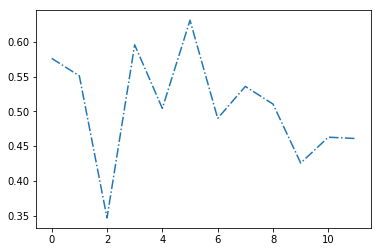

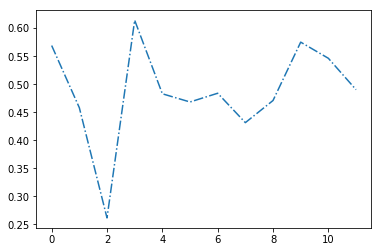

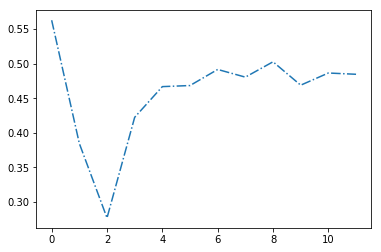

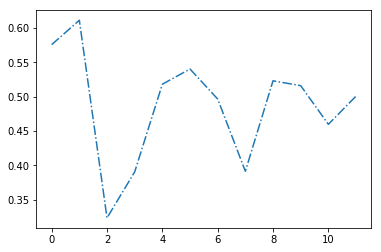

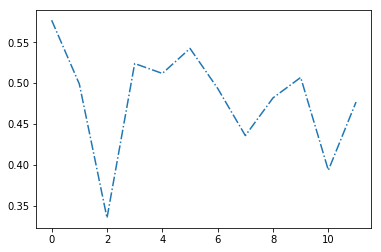

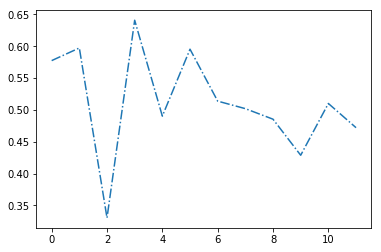

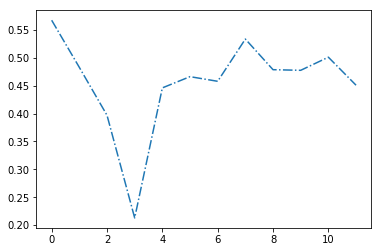

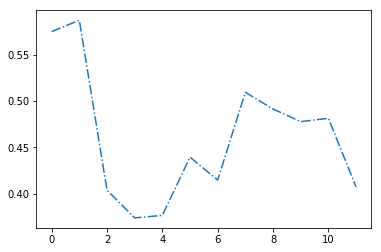

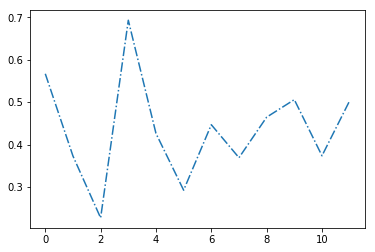

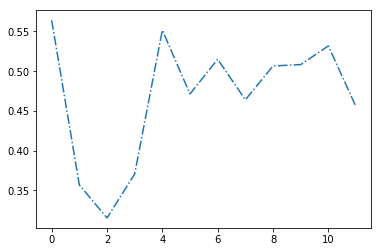

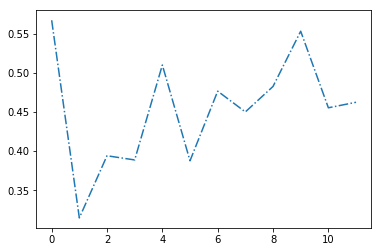

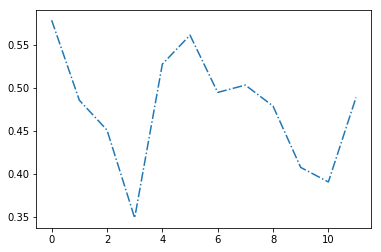

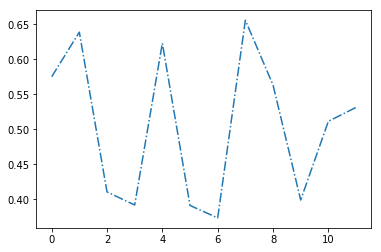

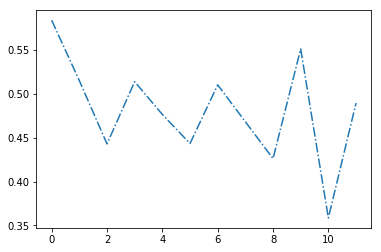

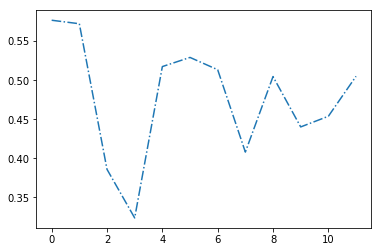

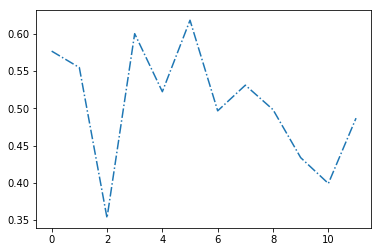

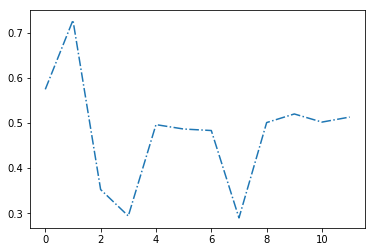

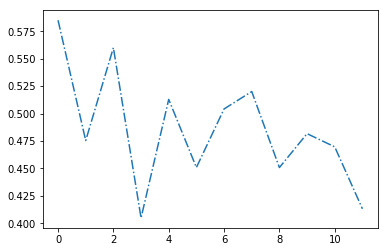

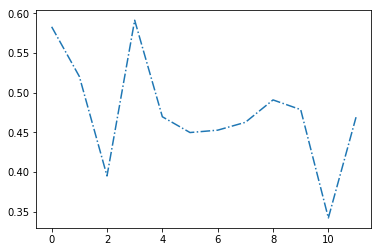

In [34]:
for i in range(100):
    plt.plot(timbre[i], '-.')
    plt.show()

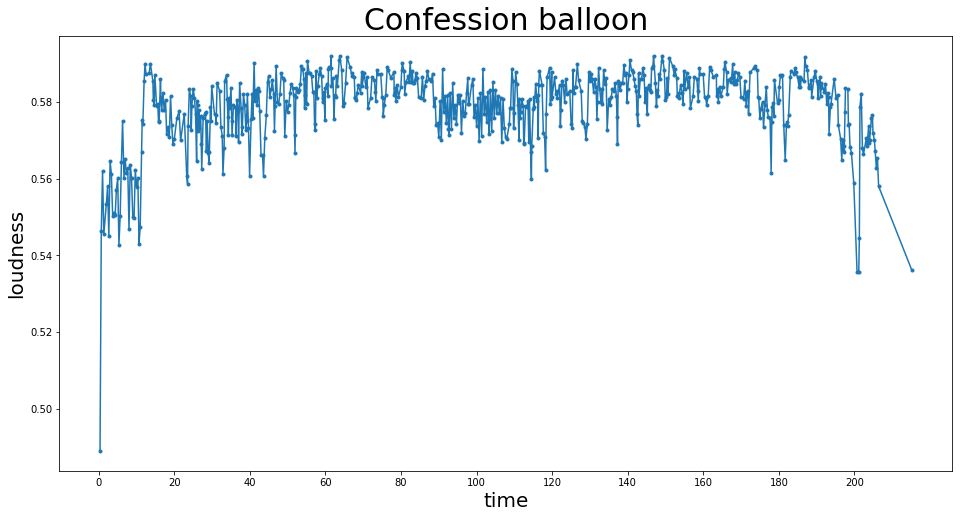

In [52]:
plt.figure(figsize=(16,8))
plt.plot(duration.cumsum(), timbre[:,0], '.-')
plt.xticks(np.arange(0,duration.cumsum()[-1], step=20), rotation=0)
plt.xlabel('time', fontsize=20)
plt.ylabel('loudness', fontsize=20)
plt.title('Confession balloon', fontsize=30)
plt.show()

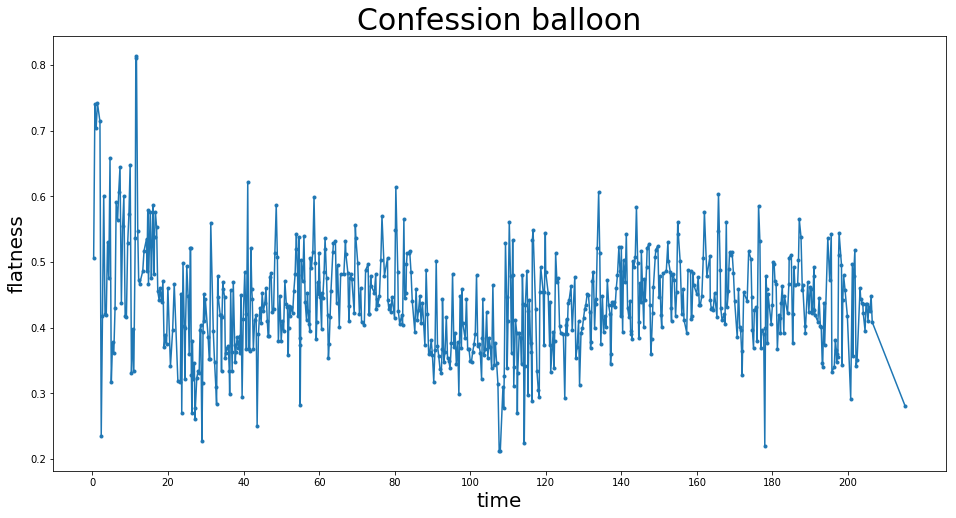

In [51]:
plt.figure(figsize=(16,8))
plt.plot(duration.cumsum(), timbre[:,2], '.-')
plt.xticks(np.arange(0,duration.cumsum()[-1], step=20), rotation=0)
plt.xlabel('time', fontsize=20)
plt.ylabel('flatness', fontsize=20)
plt.title('Confession balloon', fontsize=30)
plt.show()